In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
#from scipy.stats import zscore


In [122]:
#pip install shap

In [123]:
#pip install tensorflow

In [124]:
#1-Load and Explore the Data  ok
#2-Understand the Variables   ok
#3-Visualize the Data         ok
#4-Correlation Analysis       ok
#5-Model Building             ok          
#6-Interpretation             ok
#7-Advanced Exploration

## Types of Feature Analysis:

Type	              Description
Univariate analysis: Examining each feature separately (e.g., histograms, boxplots).
Bivariate analysis: Examining the relationship between one feature and the target (e.g., scatter plots, correlation).
Multivariate analysis: Analyzing multiple features together (e.g., PCA, heatmaps).
Correlation analysis: Checking how strongly features are related to each other and/or to the target.
Distribution analysis: Seeing the spread, skewness, or modality of each feature.
Feature importance: Ranking features based on how much they influence model output (e.g., using Random Forests or SHAP values).

### Univariate analysis: Examining each feature separately (e.g., histograms, boxplots).

### A-Load and Explore the Data

In [140]:
df = pd.read_parquet('data/dataset.parquet')

In [126]:
#df.info()

In [141]:
df.head()

time  electrons_energy_median_MeV  \
shotid                                                 
514732334  1.567094e+09                   288.193682   
514732335  1.567094e+09                   257.220779   
514732336  1.567094e+09                   279.800605   
514732337  1.567094e+09                   268.503046   
514732338  1.567094e+09                   268.692341   

           electrons_energy_mad_MeV  laser_energy_J  \
shotid                                                
514732334                  4.497873        2.532762   
514732335                 10.510899        2.539772   
514732336                  3.420069        2.536967   
514732337                  8.155782        2.513696   
514732338                  7.497664        2.515378   

           laser_oap_nearfield_center_x_pixels  \
shotid                                           
514732334                           -27.959241   
514732335                           -28.340041   
514732336                           -28.483103   
514732337                           -28.287686   
514732338                           -28.246861   

           laser_oap_nearfield_width_x_pixels  \
shotid                                          
514732334                           35.943006   
514732335                           35.705624   
514732336                           35.720589   
514732337                           35.426089   
514732338                           35.621261   

           laser_oap_nearfield_center_y_pixels  \
shotid                                           
514732334                            -2.114479   
514732335                            -2.375359   
514732336                            -2.500067   
514732337                            -2.371404   
514732338                            -2.190743   

           laser_oap_nearfield_width_y_pixels  \
shotid                                          
514732334                           28.450631   
514732335                           28.548552   
514732336                           28.670910   
514732337                           28.517630   
514732338                           28.622804   

           laser_oap_farfield_center_x_pixels  \
shotid                                          
514732334                         -365.102624   
514732335                         -367.513394   
514732336                         -365.506531   
514732337                         -367.437206   
514732338                         -365.617808   

           laser_oap_farfield_width_x_pixels  ...  laser_wavefront_tilt_x_um  \
shotid                                        ...                              
514732334                          78.513142  ...                   0.008936   
514732335                          79.080028  ...                   0.031336   
514732336                          79.112464  ...                   0.013036   
514732337                          79.086610  ...                   0.013598   
514732338                          78.281722  ...                  -0.024068   

           laser_wavefront_tilt_y_um  laser_wavefront_defocus_um  \
shotid                                                             
514732334                  -0.248603                    0.008786   
514732335                  -0.209215                    0.001557   
514732336                  -0.254599                    0.009013   
514732337                  -0.176325                    0.002047   
514732338                  -0.249742                    0.001794   

           laser_wavefront_astigmatism_oblique_um  \
shotid                                              
514732334                               -0.015730   
514732335                               -0.011106   
514732336                               -0.007293   
514732337                               -0.014763   
514732338                               -0.014976   

           laser_wavefront_astigmatism_vertical_um  \
shotid                                    

In [128]:
#df.shape 

In [129]:
#df.isnull().sum()

In [130]:
#df.describe()

In [131]:
#df['electrons_energy_median_MeV'].describe()

In [132]:
#df.columns

In [133]:
#print(df)

In [134]:
#df.corr(numeric_only=True)

# EDA

Only consider shots where:

electrons_charge_pC > 5

(Optional) Also filter beam energy to valid range (e.g., > 0 MeV and < 300 MeV)

## B-Visualize the Data
### 1-electrons_energy_median_MeV

<Axes: xlabel='electrons_energy_median_MeV', ylabel='Count'>

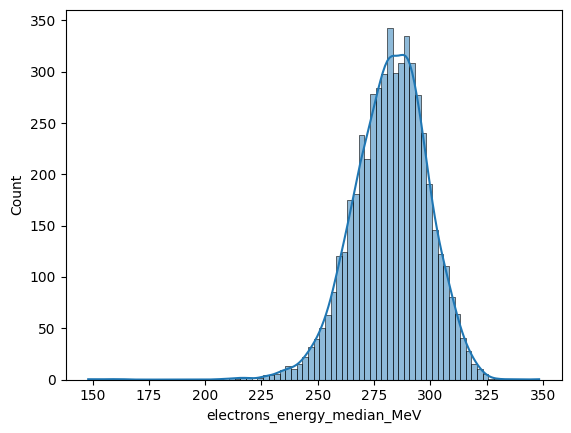

In [135]:
sns.histplot(df['electrons_energy_median_MeV'], kde=True)

<Axes: xlabel='electrons_energy_median_MeV'>

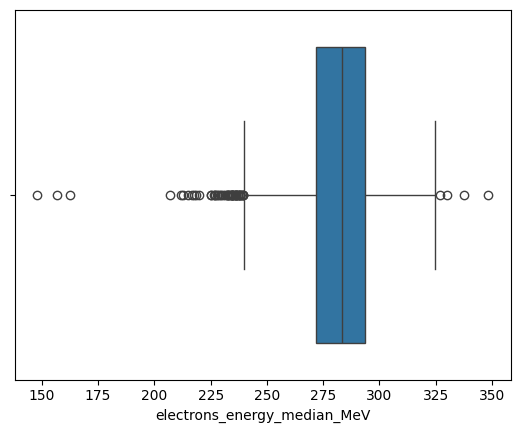

In [136]:
sns.boxplot(x=df['electrons_energy_median_MeV'])

### 2-electrons_charge_pC

<Axes: xlabel='electrons_charge_pC', ylabel='Count'>

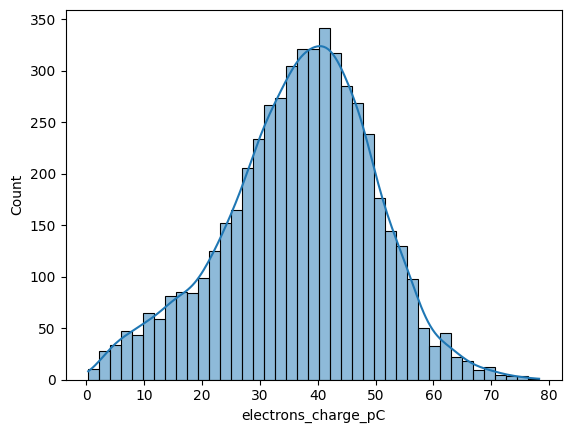

In [17]:
sns.histplot(df['electrons_charge_pC'], kde=True)

<Axes: xlabel='electrons_charge_pC'>

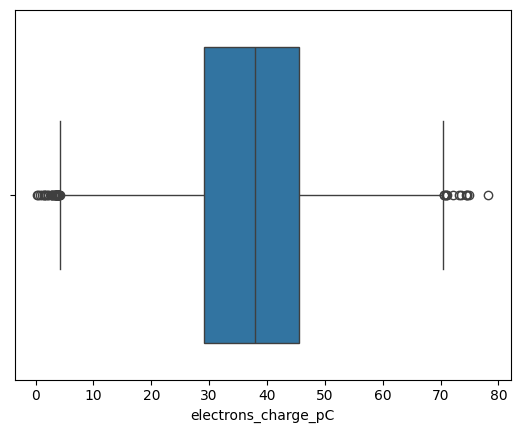

In [18]:
sns.boxplot(x=df['electrons_charge_pC'])

### 3-electrons_energy_mad_MeV

<Axes: xlabel='electrons_energy_mad_MeV', ylabel='Count'>

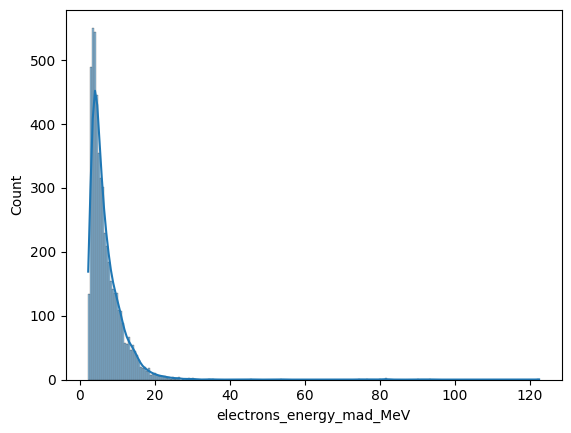

In [19]:
sns.histplot(df['electrons_energy_mad_MeV'], kde=True)

<Axes: xlabel='electrons_energy_mad_MeV'>

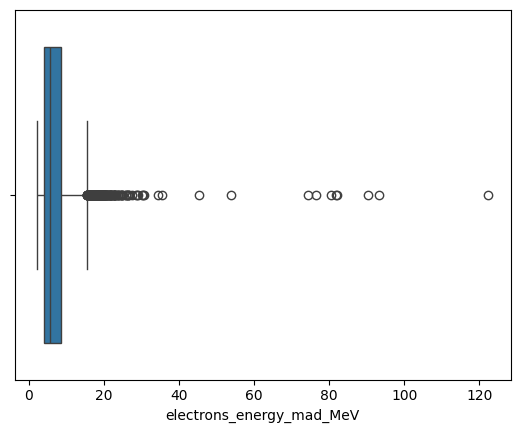

In [20]:
sns.boxplot(x=df['electrons_energy_mad_MeV'])

In [ ]:
#before applying the filter.

In [142]:
#Identifying Outlier in the dataset
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
df_outliers = df[outlier_mask.any(axis=1)]
print(f"Outliers detected using IQR: {len(df_outliers)}")

Outliers detected using IQR: 957


In [ ]:
#apply filter 
#take 5 < electrons_charge_pC < 45
#consider only data in the range of 5 to 45

In [143]:
df_filtered = df[
    (df['electrons_charge_pC'] > 5) & 
    (df['electrons_charge_pC'] < 45) &
    (df['electrons_energy_median_MeV'] > 0) &
    (df['electrons_energy_mad_MeV'] < 300)
].copy()

In [ ]:
#after filtering 

In [119]:
Q1 = df_filtered[numeric_cols].quantile(0.25)
Q3 = df_filtered[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_filtered[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_filtered[numeric_cols] > (Q3 + 1.5 * IQR))
df_outliers = df_filtered[outlier_mask.any(axis=1)]
print(f"Outliers detected using IQR: {len(df_outliers)}")

Outliers detected using IQR: 706


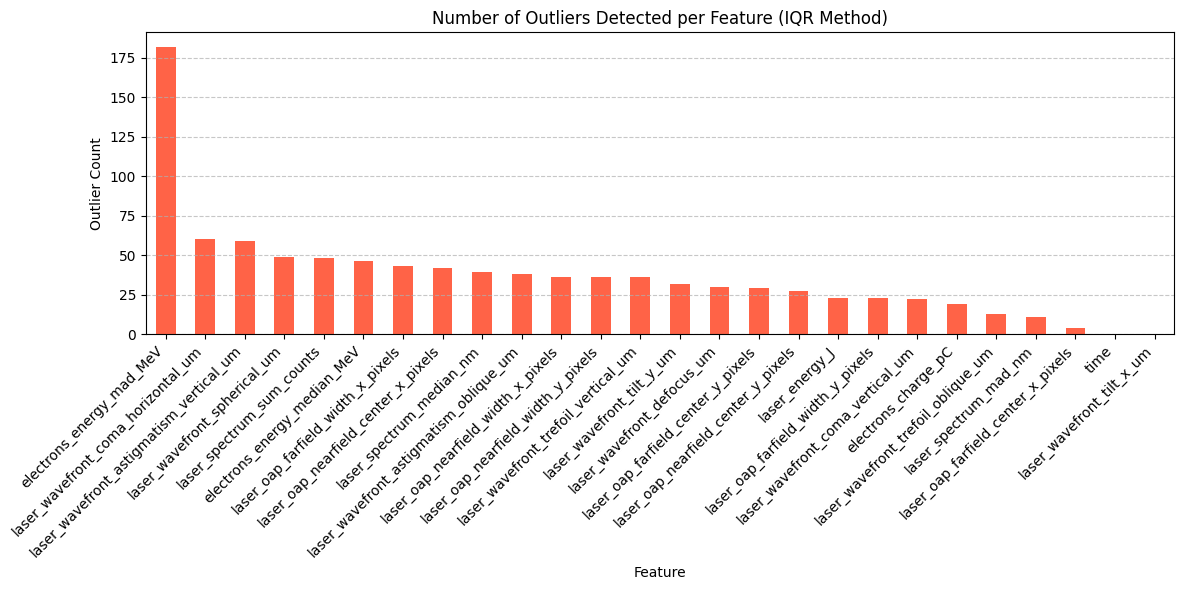

In [144]:
# Assuming df_filtered is your DataFrame and numeric_cols are the numeric features
Q1 = df_filtered[numeric_cols].quantile(0.25)
Q3 = df_filtered[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Mask of outliers per feature
outlier_mask = (df_filtered[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_filtered[numeric_cols] > (Q3 + 1.5 * IQR))

# Count outliers per column
outlier_counts = outlier_mask.sum()

# Sort and plot
outlier_counts = outlier_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
outlier_counts.plot(kind='bar', color='tomato')
plt.title('Number of Outliers Detected per Feature (IQR Method)')
plt.ylabel('Outlier Count')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

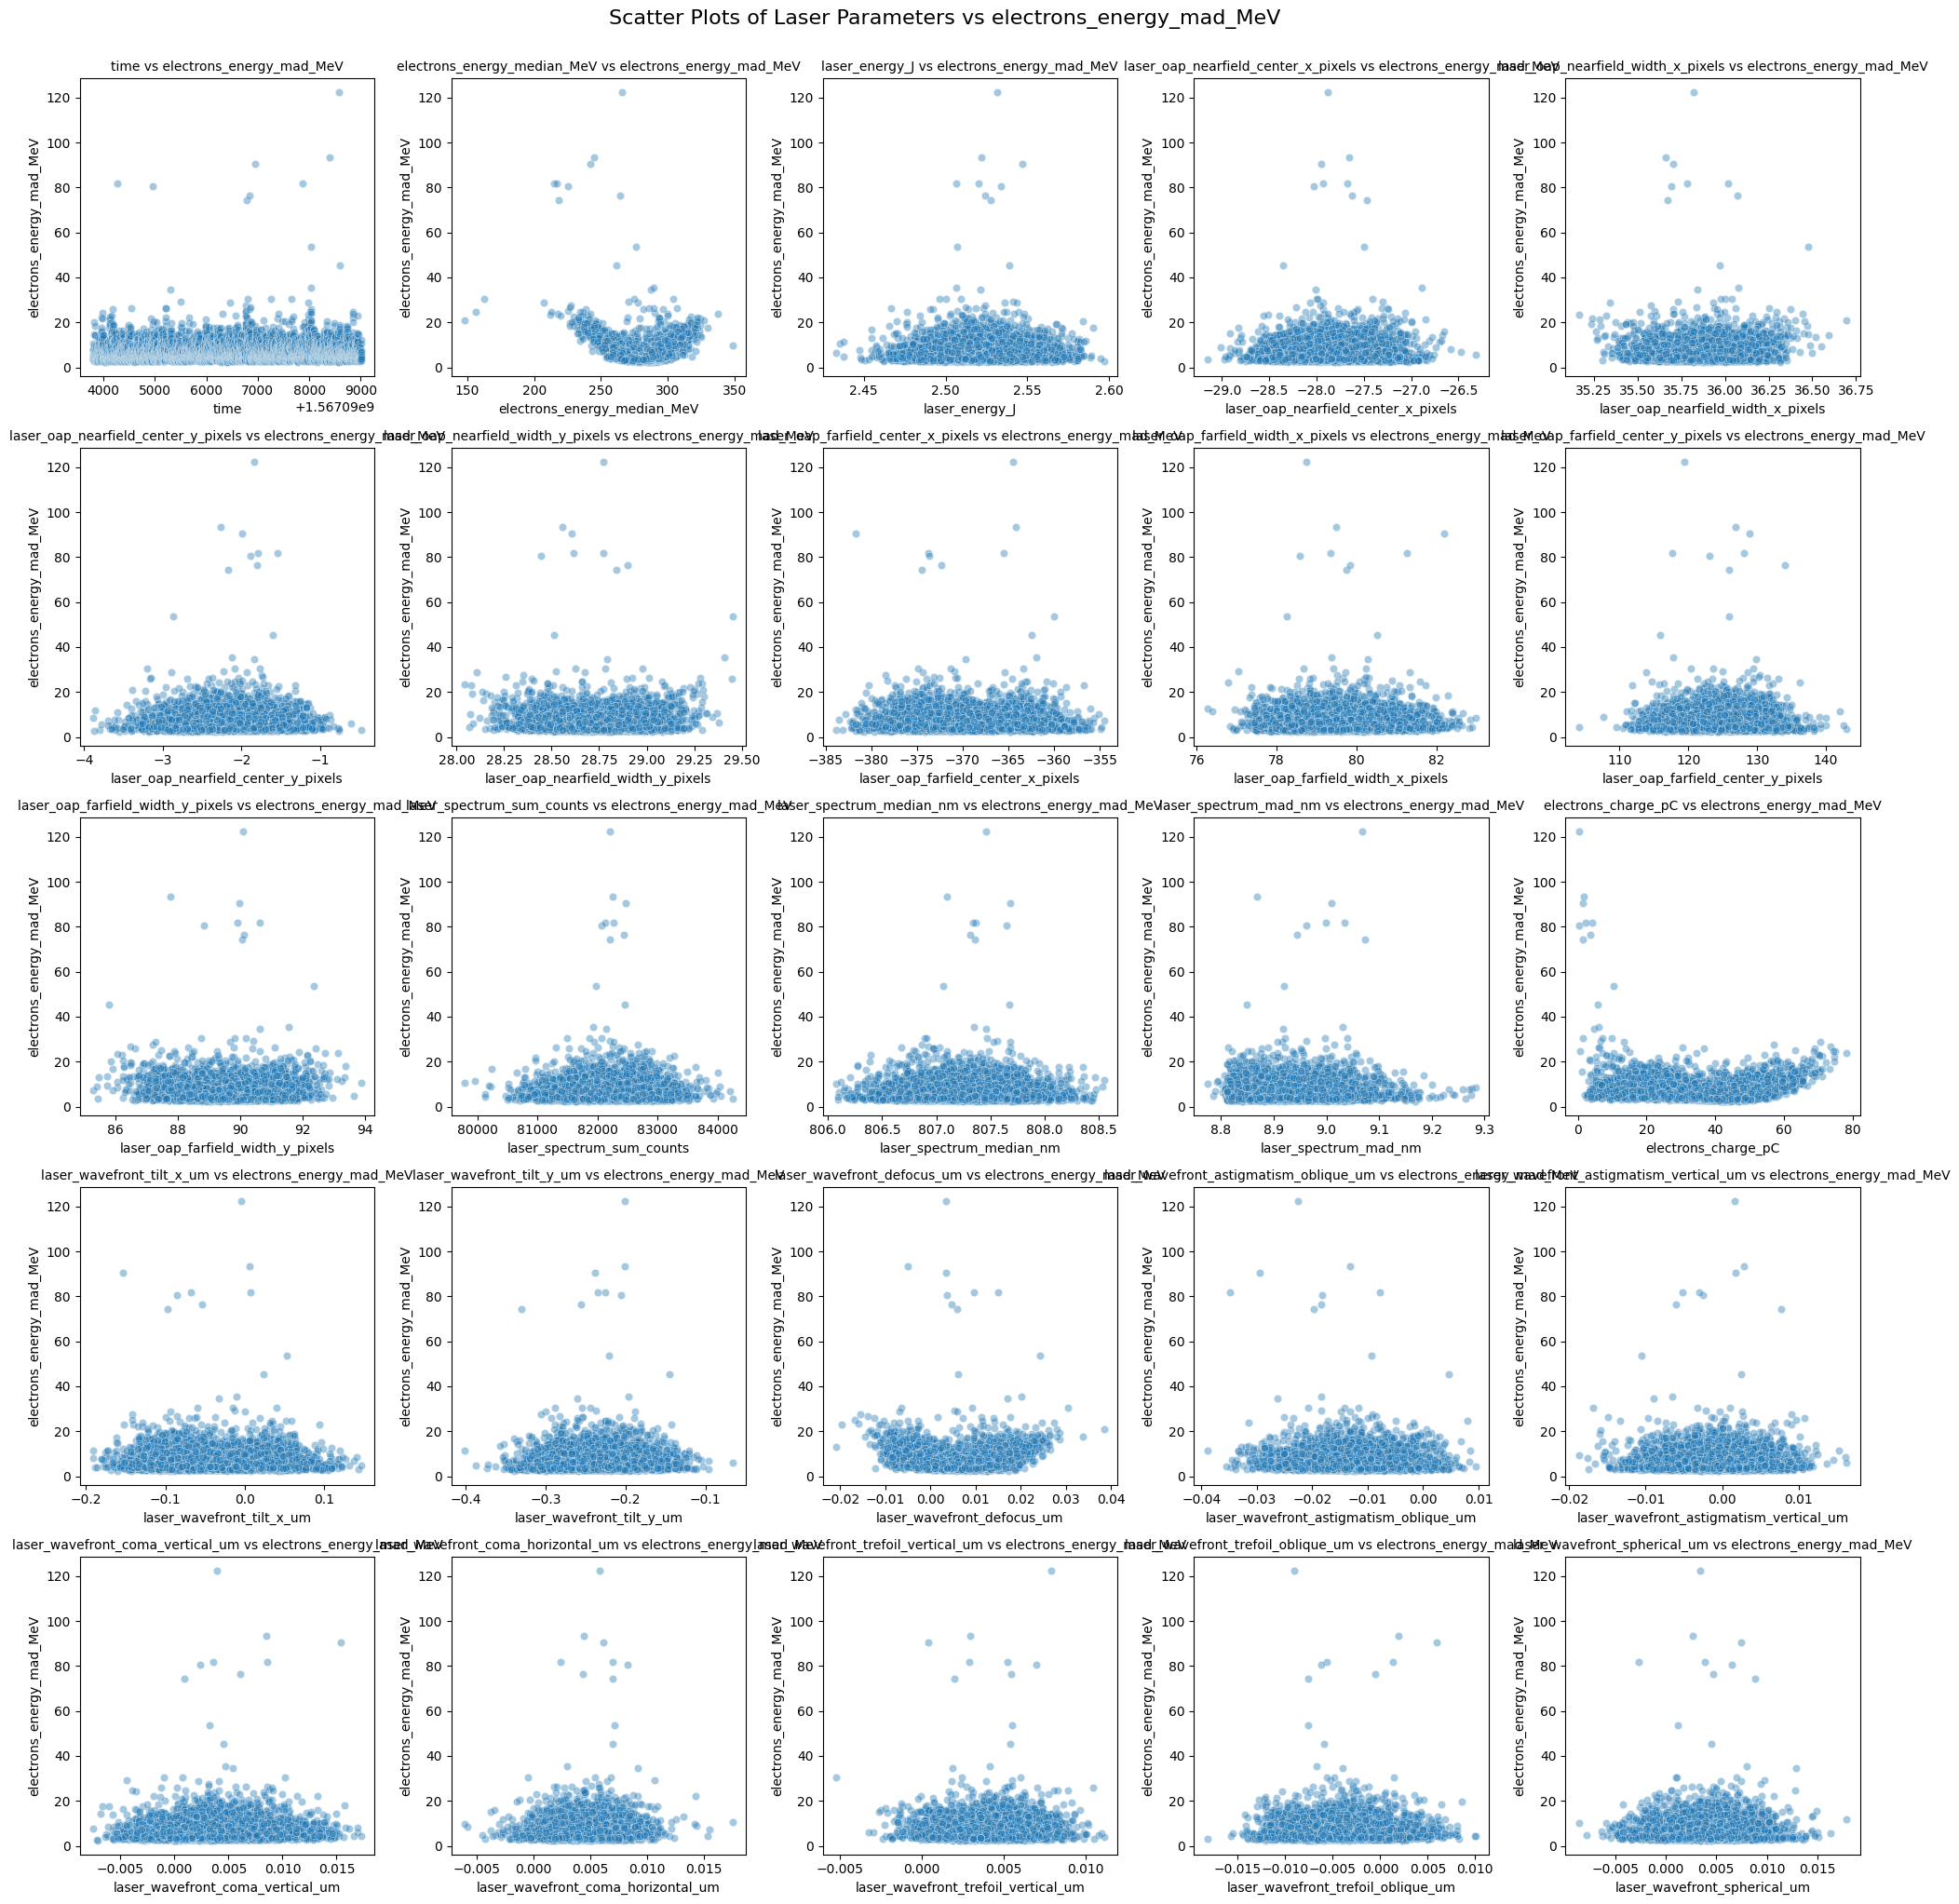

In [33]:
# Set your target/output variable
target = 'electrons_energy_mad_MeV'

# Select numeric features excluding the target
features = df_filtered.select_dtypes(include='number').columns.drop(target)

# Define layout
n = len(features)
cols = math.ceil(math.sqrt(n))  # square layout
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
axes = axes.flatten()

# Plot each feature vs target
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i], alpha=0.4)
    axes[i].set_title(f'{feature} vs {target}', fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle(f'Scatter Plots of Laser Parameters vs {target}', fontsize=16, y=1.02)
plt.show()

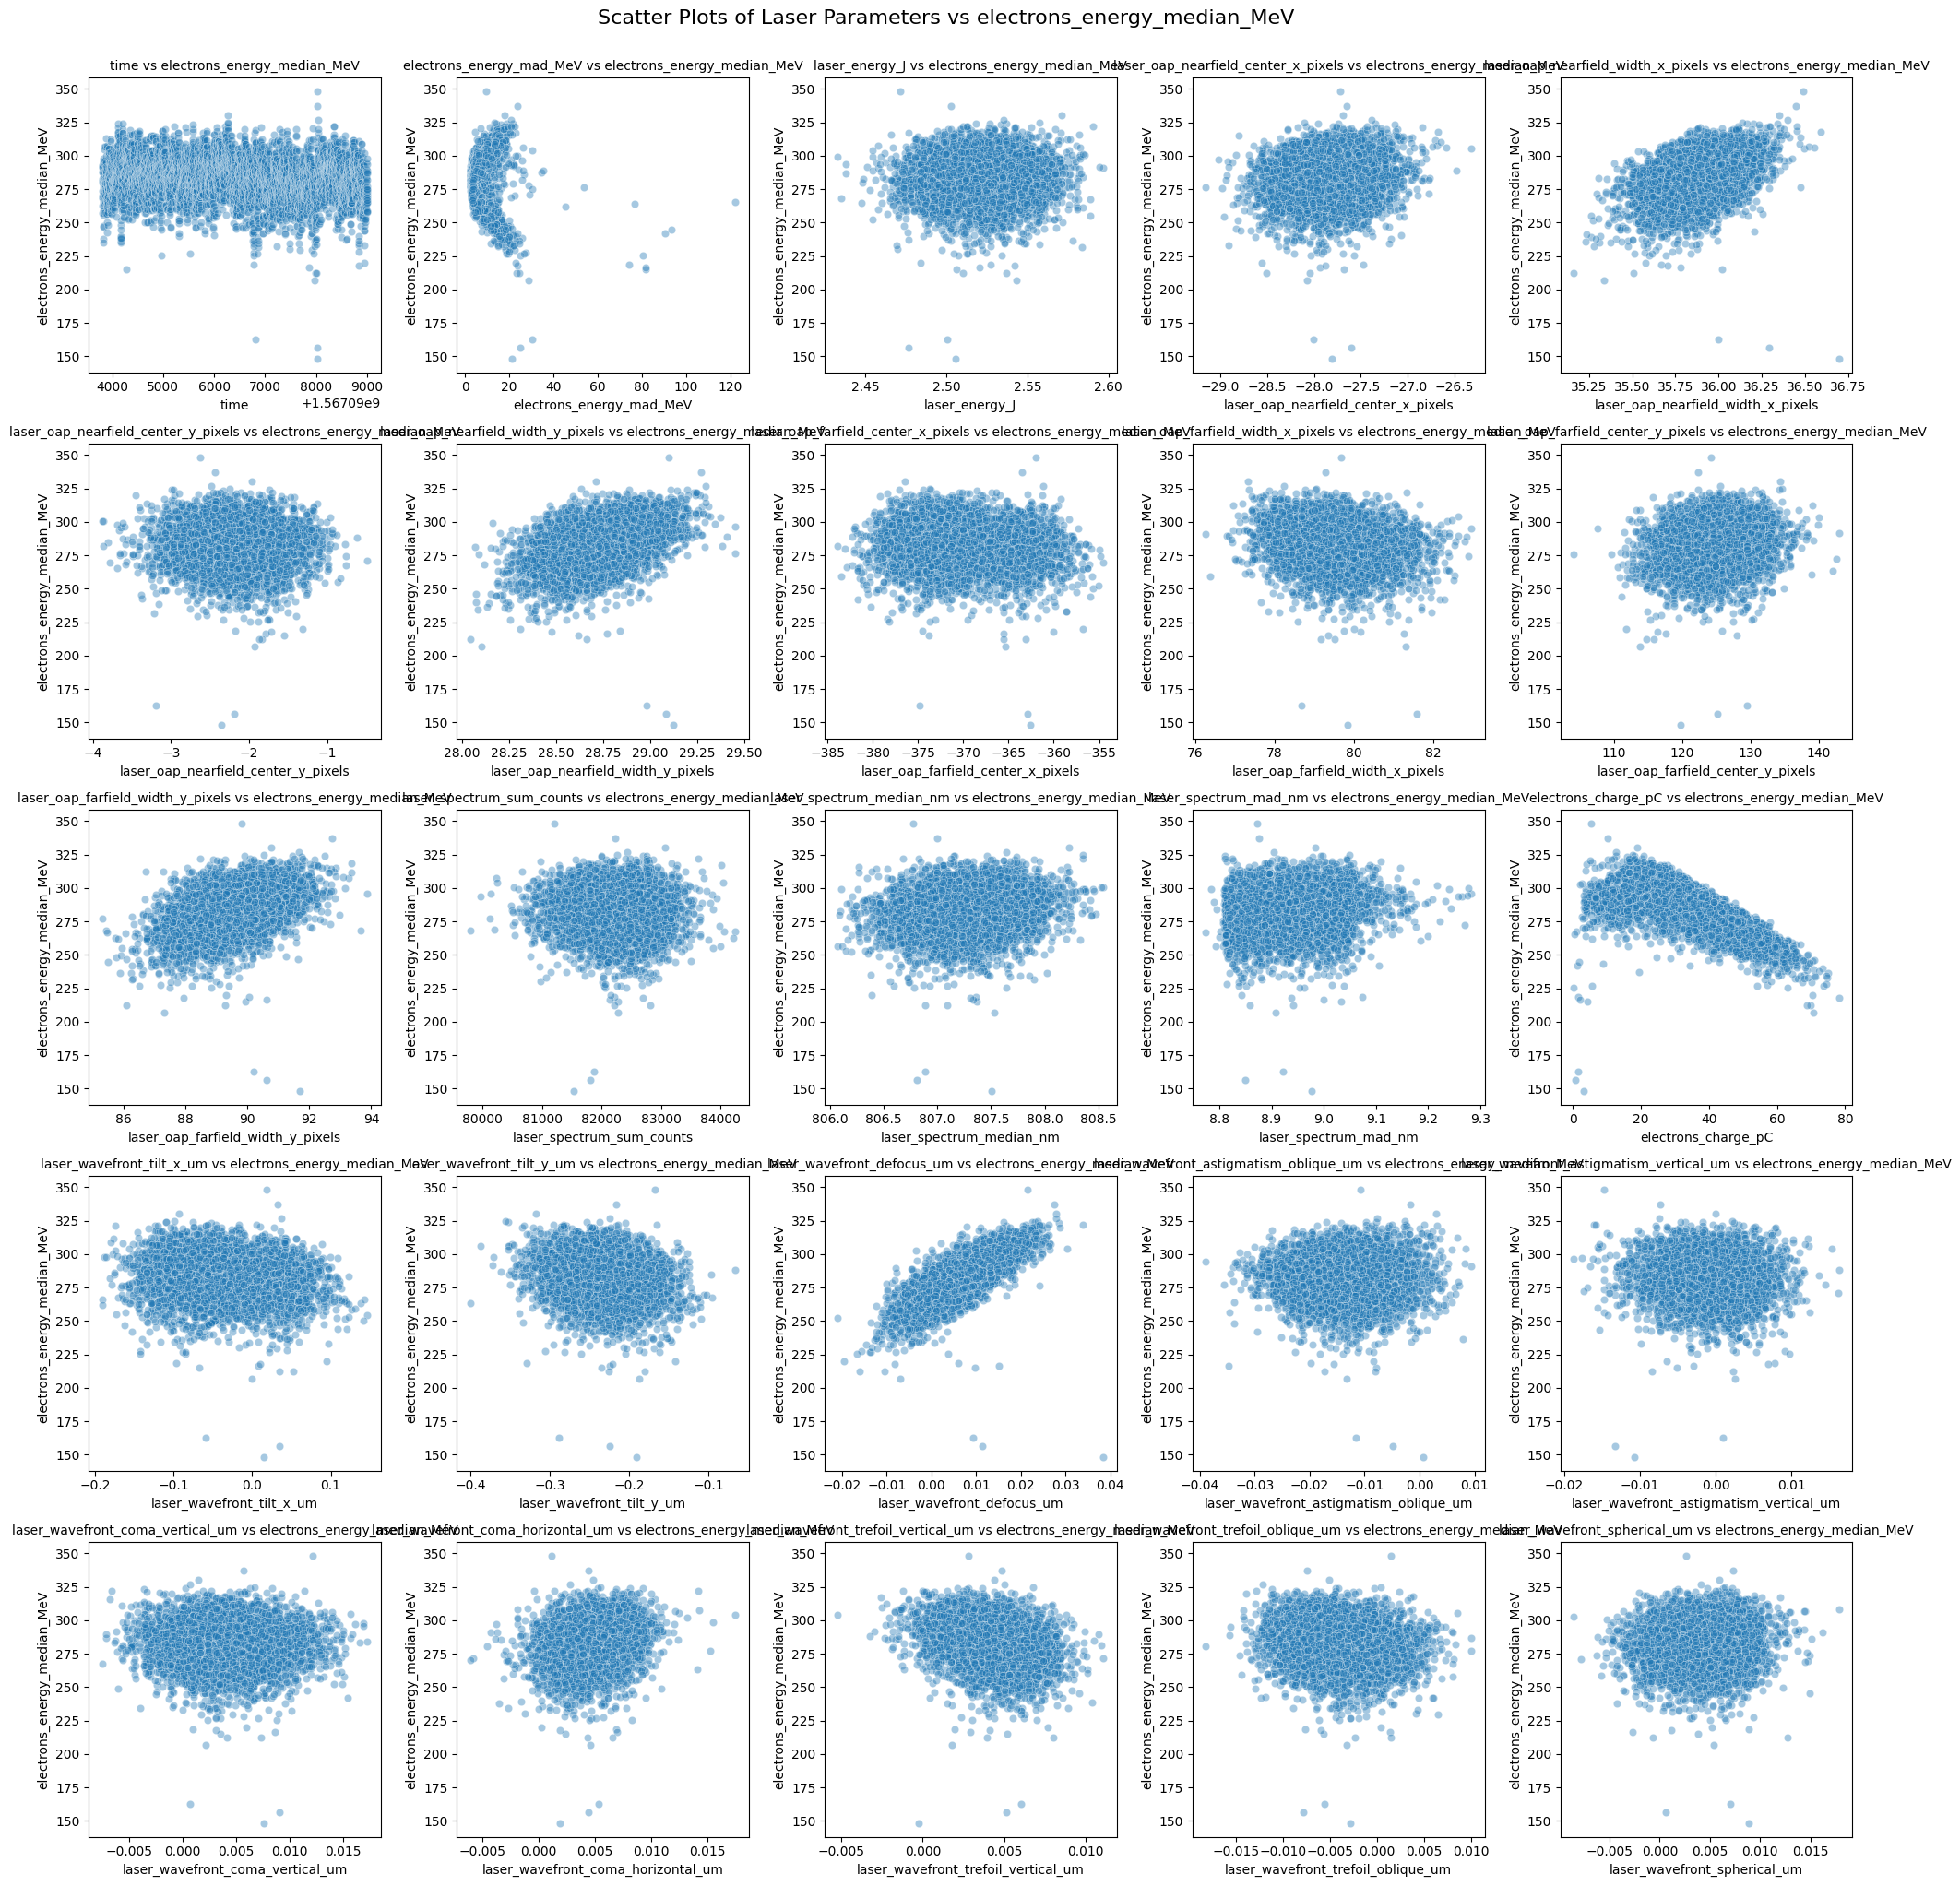

In [34]:
# Set your target/output variable
target = 'electrons_energy_median_MeV'

# Select numeric features excluding the target
features = df_filtered.select_dtypes(include='number').columns.drop(target)

# Define layout
n = len(features)
cols = math.ceil(math.sqrt(n))  # square layout
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
axes = axes.flatten()

# Plot each feature vs target
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i], alpha=0.4)
    axes[i].set_title(f'{feature} vs {target}', fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle(f'Scatter Plots of Laser Parameters vs {target}', fontsize=16, y=1.02)
plt.show()

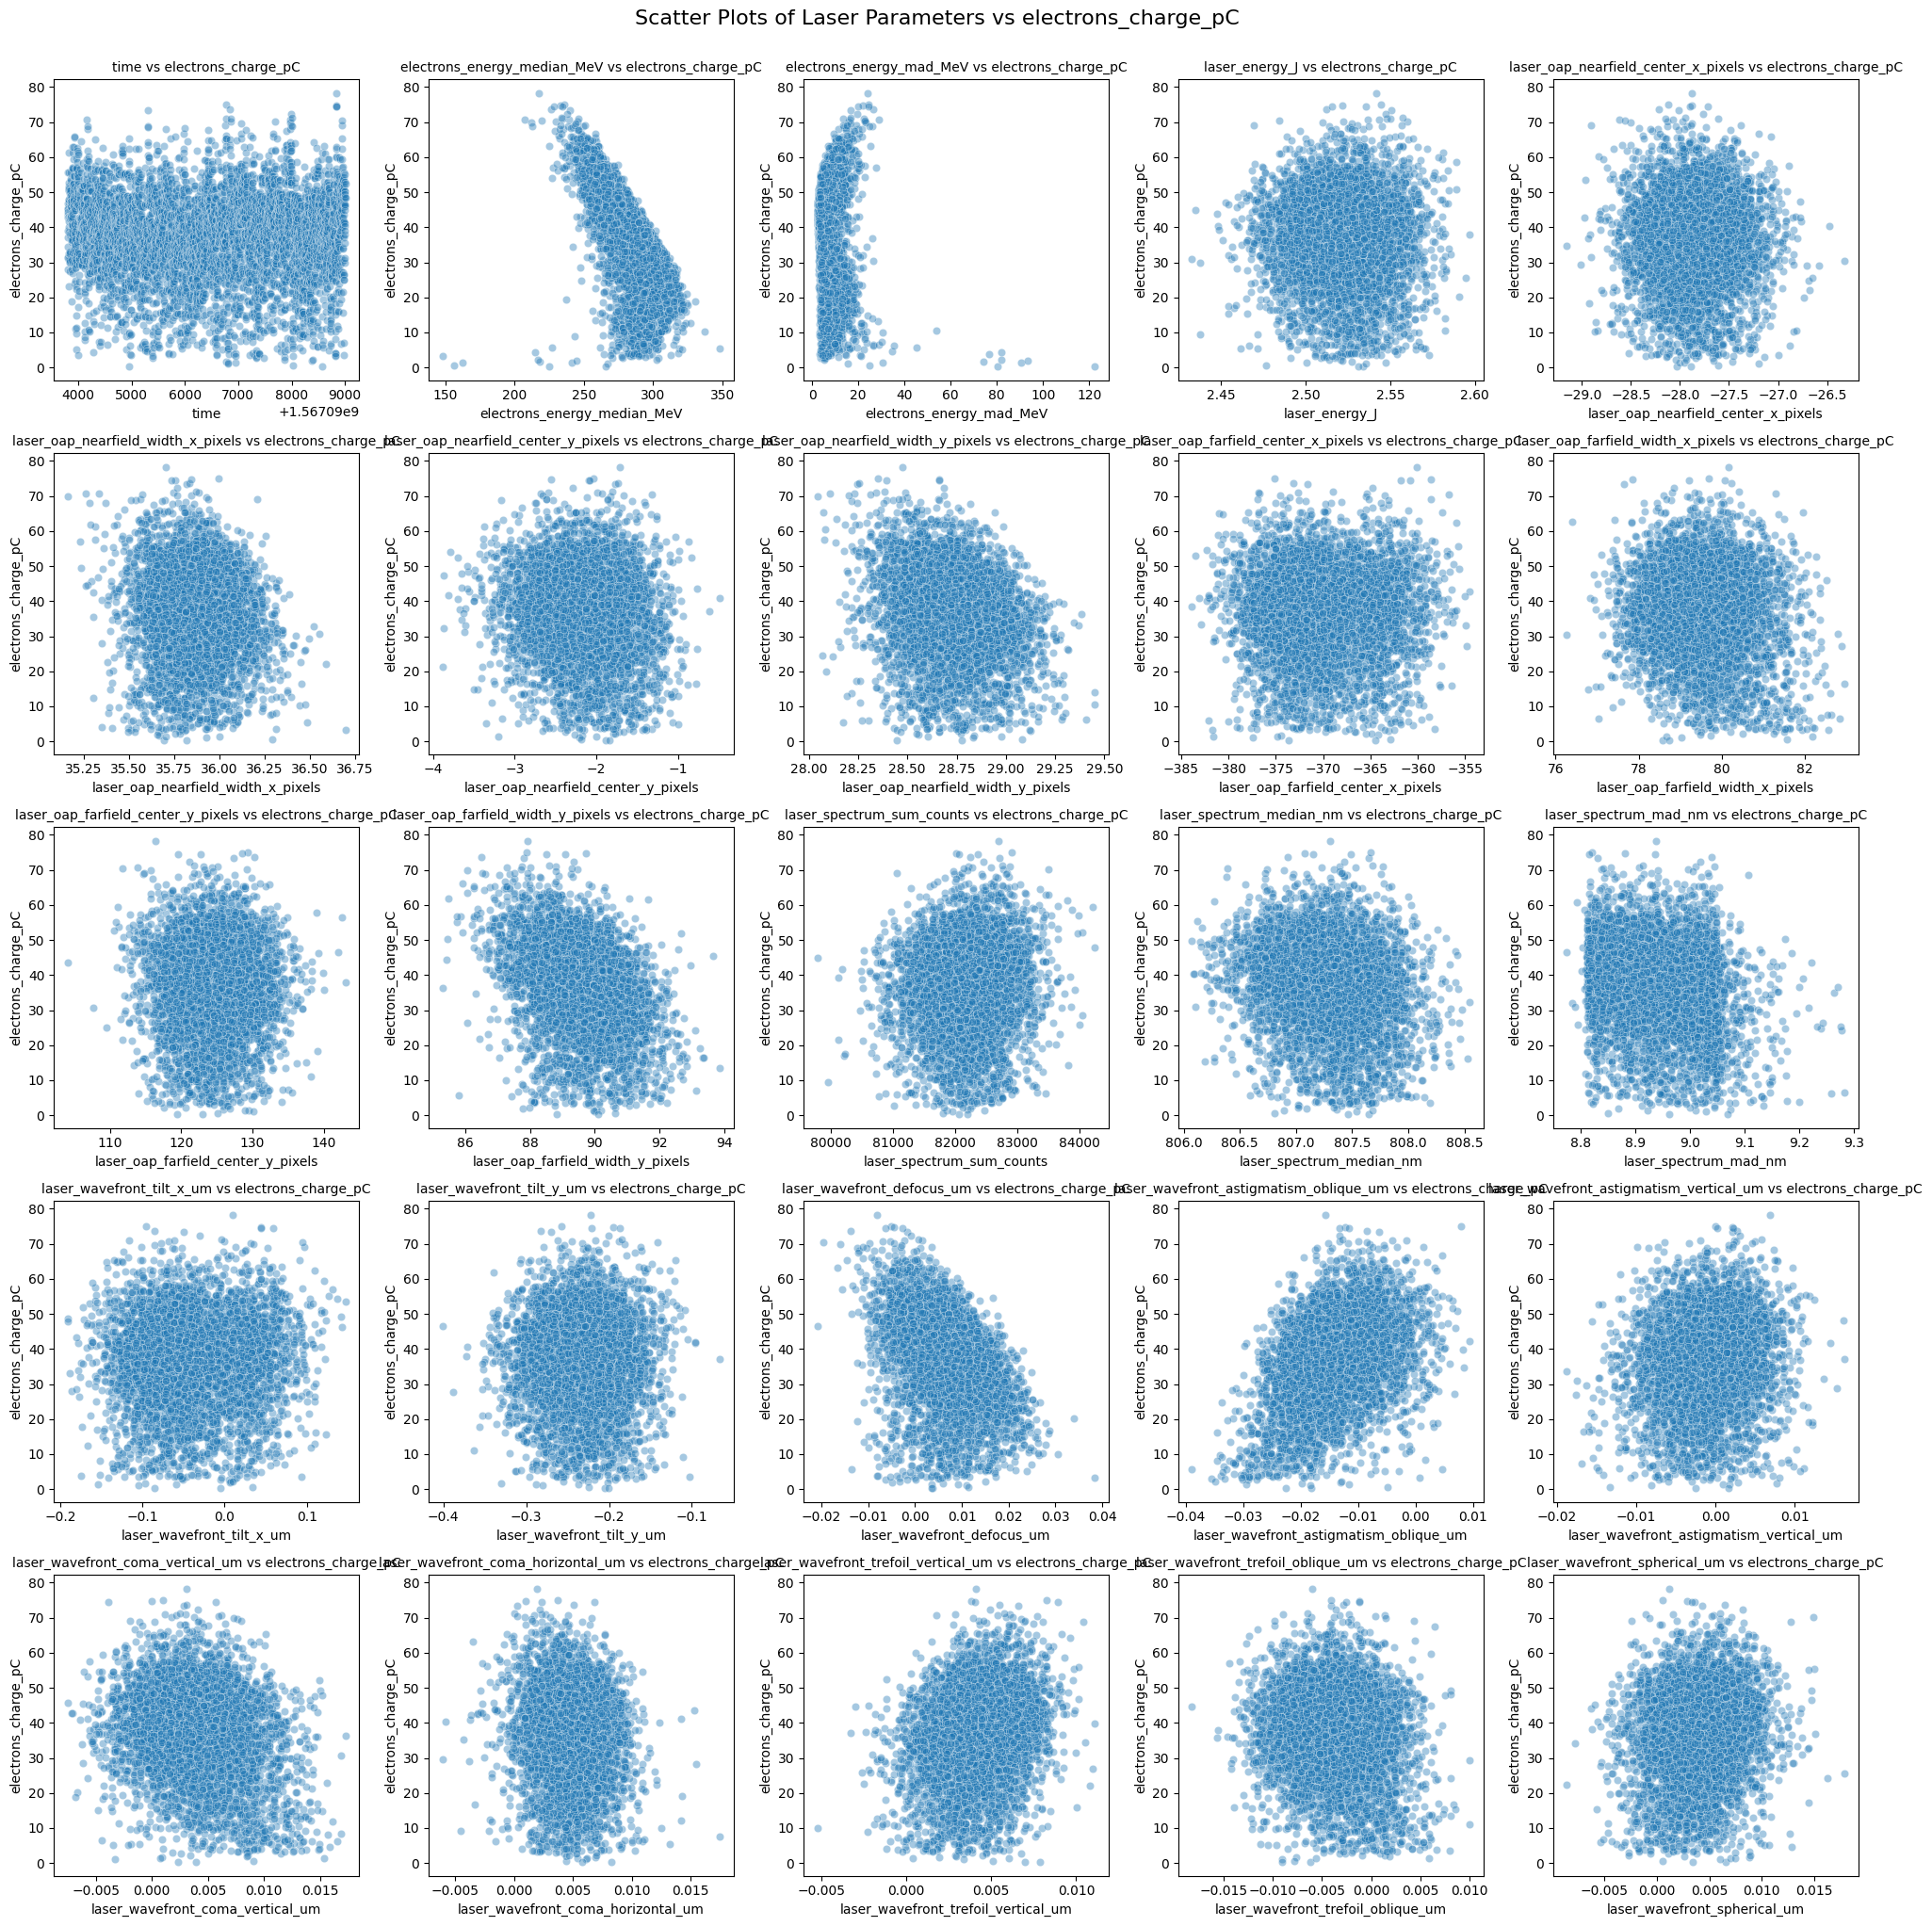

In [138]:
# Set your target/output variable
target = 'electrons_charge_pC'

# Select numeric features excluding the target
features = df_filtered.select_dtypes(include='number').columns.drop(target)

# Define layout
n = len(features)
cols = math.ceil(math.sqrt(n))  # square layout
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
axes = axes.flatten()

# Plot each feature vs target
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i], alpha=0.4)
    axes[i].set_title(f'{feature} vs {target}', fontsize=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle(f'Scatter Plots of Laser Parameters vs {target}', fontsize=16, y=1.02)
plt.show()

# C-Correlation Analysis
This step helps:
Rank which laser parameters most influence energy output   
This matrix helps you:

Identify which laser parameters most affect electron beam properties.

Optimize beamline settings for desired electron outputs.

Spot possible causality for electron behavior changes by tracking back to laser input characteristics.

<Axes: >

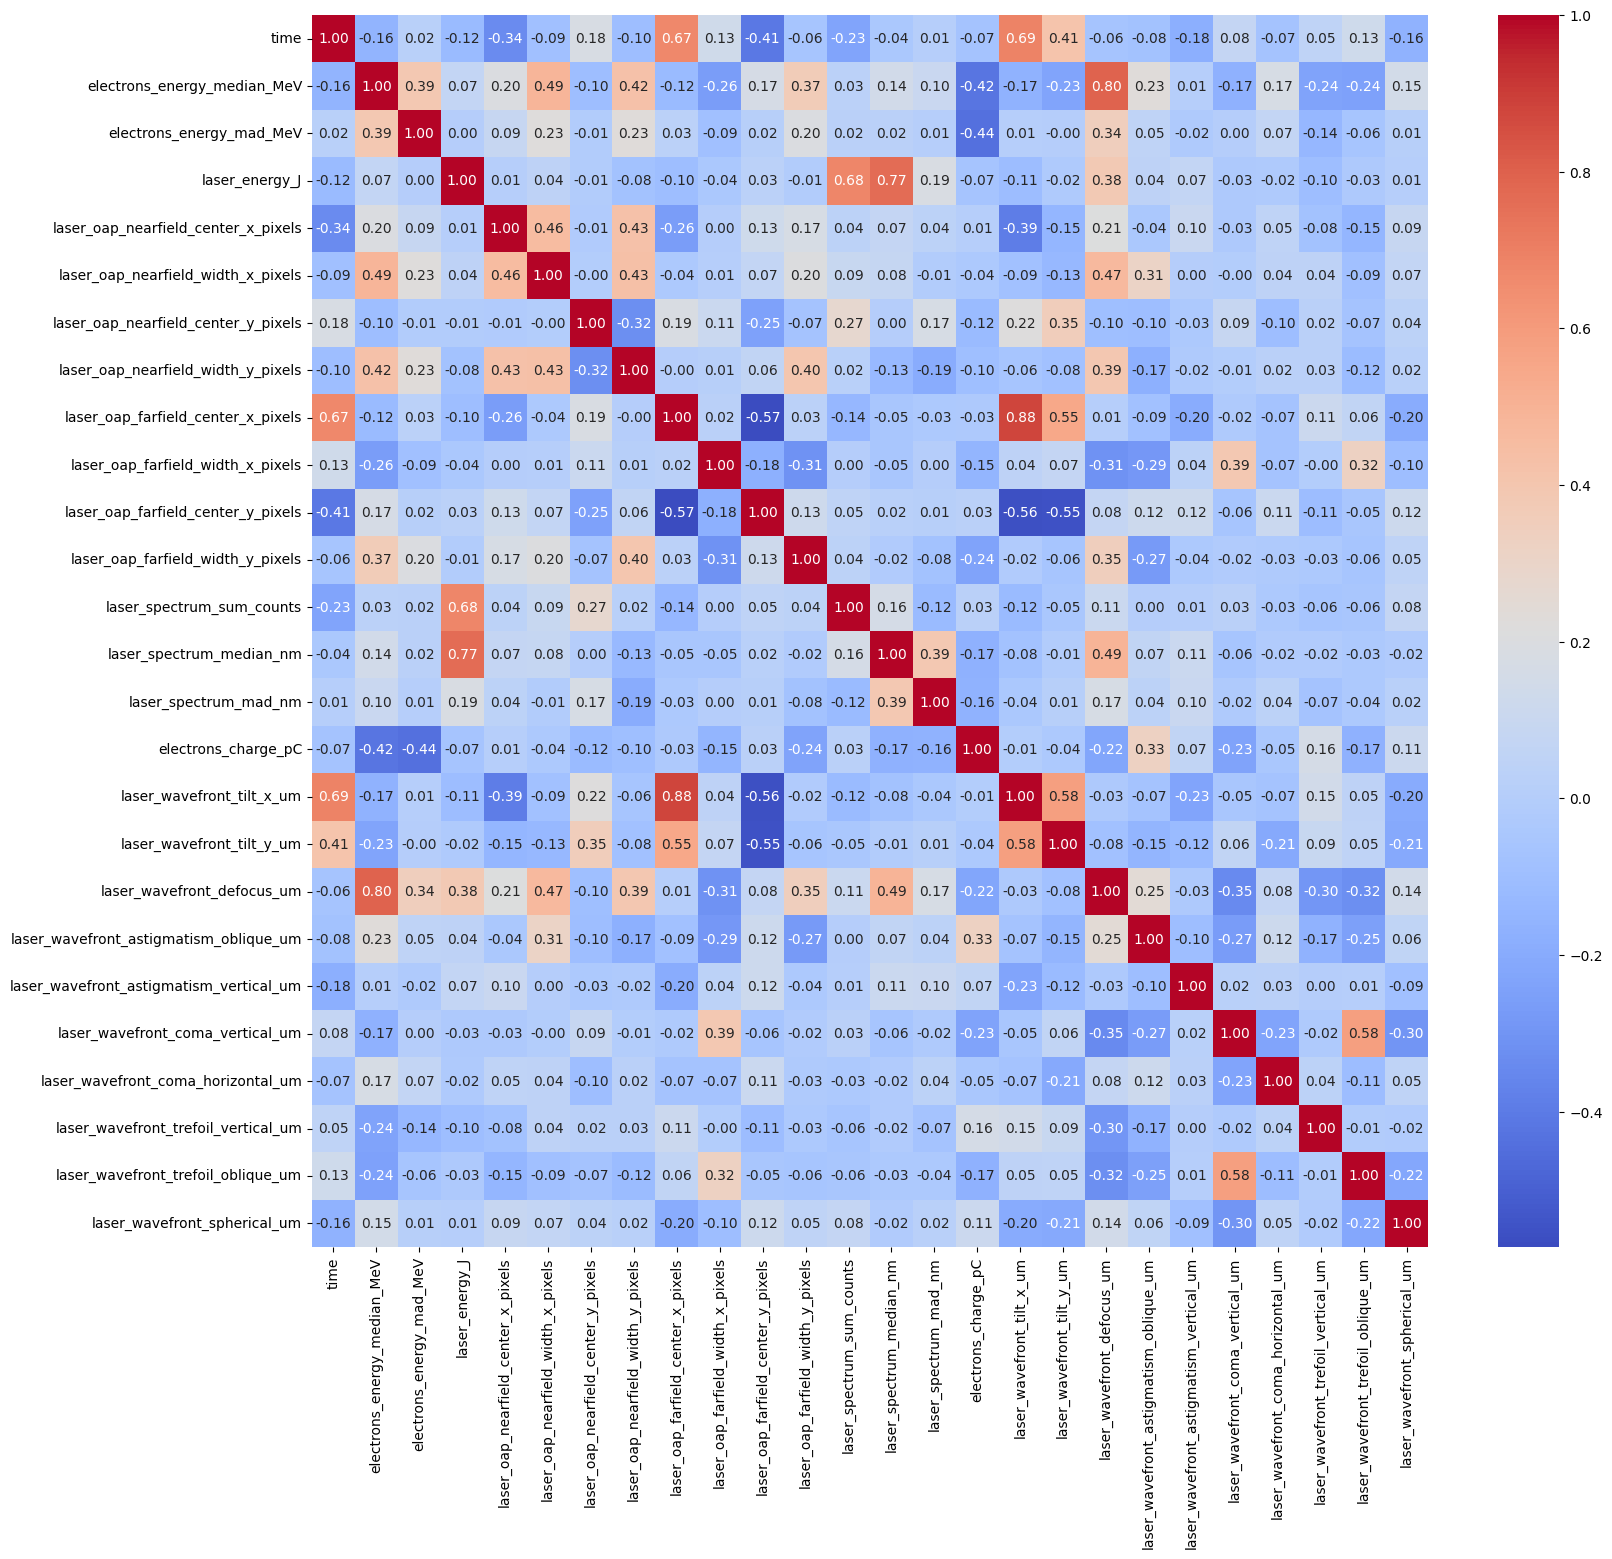

In [35]:
corr = df_filtered.corr(numeric_only=True)
plt.figure(figsize=(18,16))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', annot=True)

### electrons_energy_median_MeV

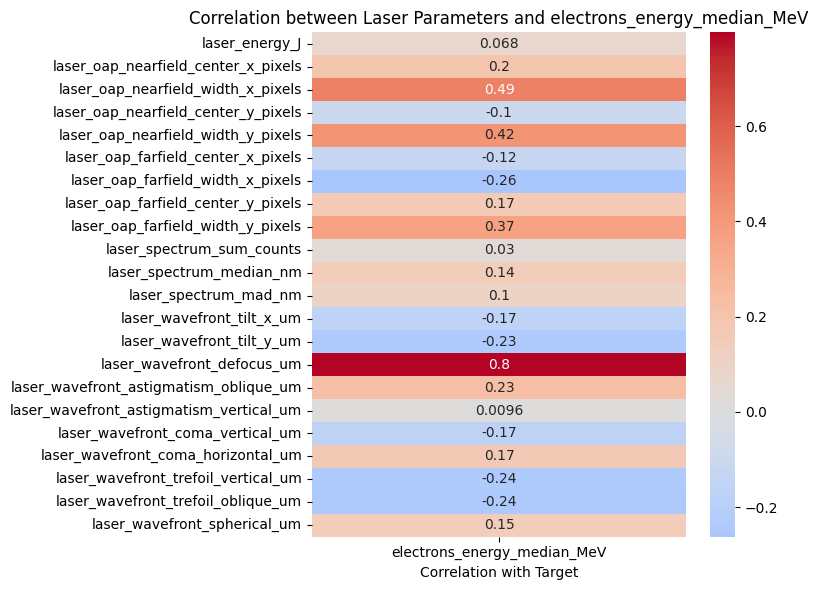

In [36]:
laser_features = [col for col in df.columns if 'laser_' in col]

# Choose the target
target = 'electrons_energy_median_MeV'  

# ---- Step 2: Compute correlation matrix ----
corr_matrix = df_filtered[laser_features + [target]].corr()

# Extract only correlations between laser parameters and the target
target_corr = corr_matrix[[target]].drop(index=target)

# ---- Step 3: Plot heatmap ----
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation between Laser Parameters and {target}')
plt.xlabel('Correlation with Target')
plt.tight_layout()
plt.show()

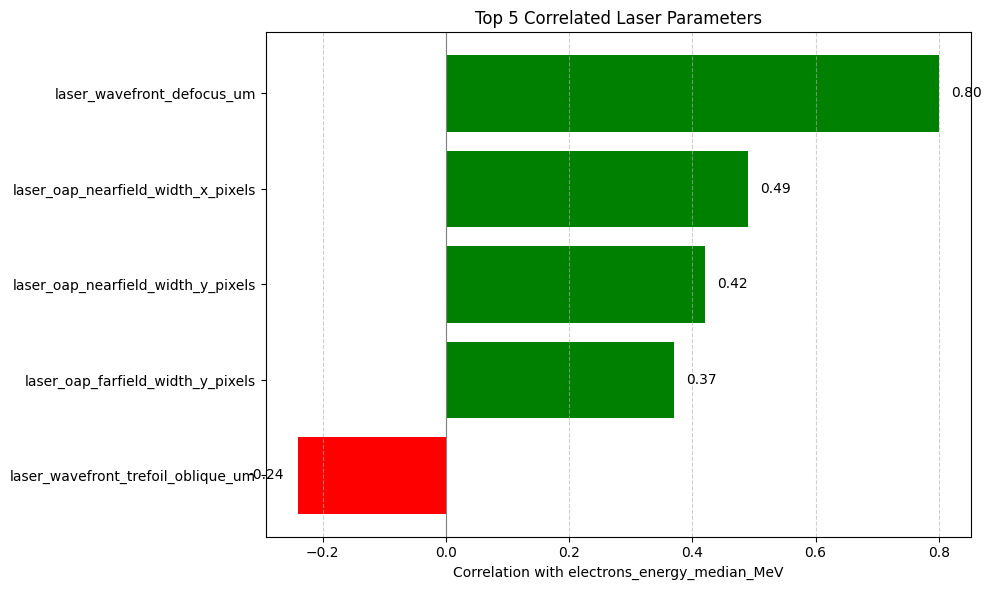

In [37]:
#Top 5 features and their correlations
features = [
    'laser_wavefront_defocus_um',
    'laser_oap_nearfield_width_x_pixels',
    'laser_oap_nearfield_width_y_pixels',
    'laser_oap_farfield_width_y_pixels',
    'laser_wavefront_trefoil_oblique_um'
]

correlations = [0.8, 0.49, 0.42, 0.37, -0.24]

# Color code
colors = ['green' if val > 0 else 'red' for val in correlations]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(features, correlations, color=colors)
plt.xlabel('Correlation with electrons_energy_median_MeV')
plt.title('Top 5 Correlated Laser Parameters')
plt.axvline(x=0, color='gray', linewidth=0.8)

# Annotate each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02 if width > 0 else width - 0.08,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}',
             va='center')

plt.tight_layout()
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.savefig("simplified_laser_correlation_chart.png")
plt.show()

### explanation: identify and explain the source of shot-to-shot variations in the electron beam energy.
-laser_wavefront_defocus_um (0.8 correlation)

Strongest positive correlation with electron energy.

Indicates that better focus (less defocus) leads to higher electron energies.

Since focus quality can change shot to shot, it's likely a key driver of energy variability.

-laser_oap_nearfield_width_x and y

Show moderate positive correlations with electron energy.

Implies that beam size and symmetry fluctuations affect the acceleration process.

Could result from laser pointing jitter or optical instabilities.

-laser_wavefront_trefoil_um and astigmatism_45deg_um

Exhibit weaker or negative correlations.

Suggest that higher-order wavefront aberrations might slightly degrade focus.

These distortions can contribute to lower energies in certain shots.



### scatter plot

<Axes: xlabel='laser_wavefront_defocus_um', ylabel='electrons_energy_median_MeV'>

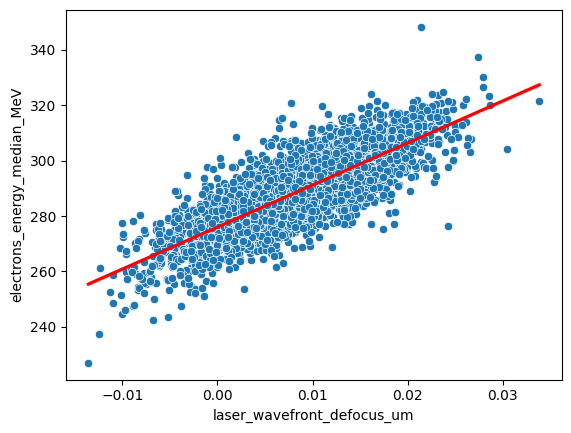

In [38]:
sns.scatterplot(x='laser_wavefront_defocus_um', y='electrons_energy_median_MeV', data=df_filtered)
# Add linear regression line
sns.regplot(data=df_filtered, x='laser_wavefront_defocus_um', y='electrons_energy_median_MeV', scatter=False, color='red', label='Linear fit')

### electrons_energy_mad_MeV

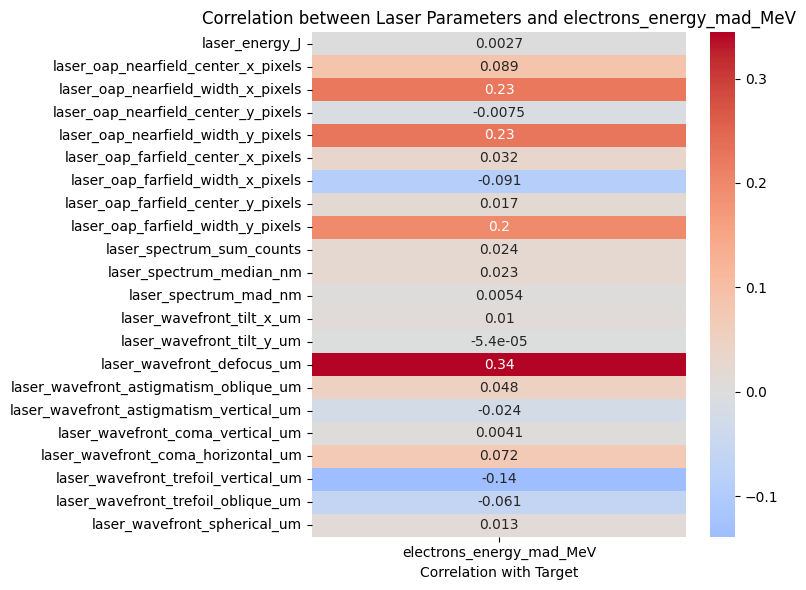

In [39]:
laser_features = [col for col in df.columns if 'laser_' in col]

# Choose the target
target = 'electrons_energy_mad_MeV'  

corr_matrix = df_filtered[laser_features + [target]].corr()

# Extract only correlations between laser parameters and the target
target_corr = corr_matrix[[target]].drop(index=target)

# ---- Step 3: Plot heatmap ----
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation between Laser Parameters and {target}')
plt.xlabel('Correlation with Target')
plt.tight_layout()
plt.show()

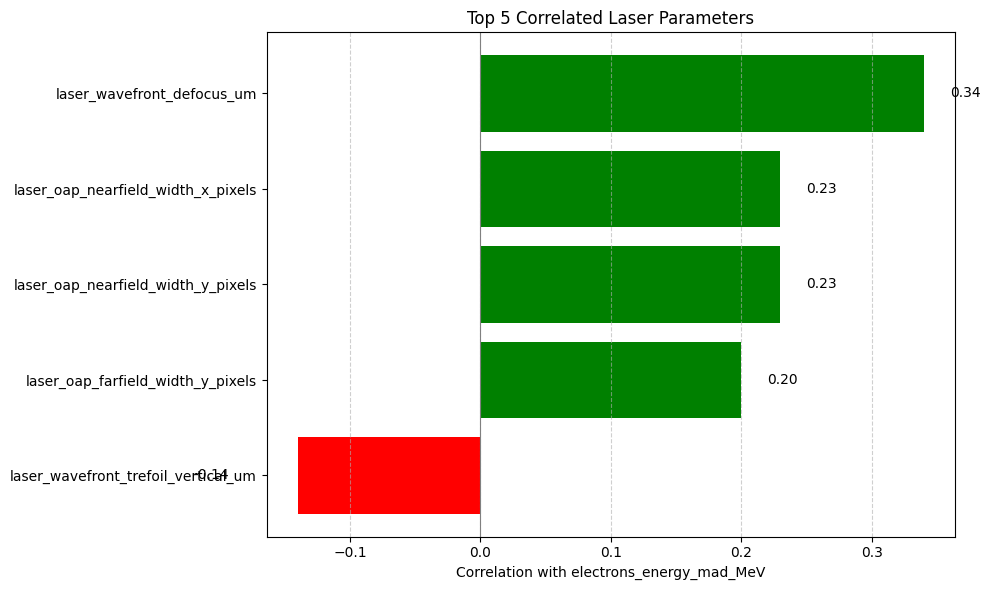

In [40]:
#Top 5 features and their correlations
features = [
    'laser_wavefront_defocus_um',
    'laser_oap_nearfield_width_x_pixels',
    'laser_oap_nearfield_width_y_pixels',
    'laser_oap_farfield_width_y_pixels',
    'laser_wavefront_trefoil_vertical_um'
]

correlations = [0.34, 0.23, 0.23, 0.20, -0.14]

# Color code
colors = ['green' if val > 0 else 'red' for val in correlations]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(features, correlations, color=colors)
plt.xlabel('Correlation with electrons_energy_mad_MeV')
plt.title('Top 5 Correlated Laser Parameters')
plt.axvline(x=0, color='gray', linewidth=0.8)

# Annotate each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02 if width > 0 else width - 0.08,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}',
             va='center')

plt.tight_layout()
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.savefig("simplified_laser_correlation_chart.png")
plt.show()

## explanation: identify and explain the source of shot-to-shot variations in the electron beam energy.
-laser_wavefront_defocus_um (0.34)

Shows the strongest positive correlation among the listed parameters.

Indicates that better focus (less defocus) tends to result in higher electron energies.

Suggests wavefront defocus is a moderate contributor to energy variation shot-to-shot.

Note: Electron beam energy fluctuations are primarily driven by laser focus quality and beam profile variations.
Improving wavefront stability and beam shape control could reduce shot-to-shot energy variability.


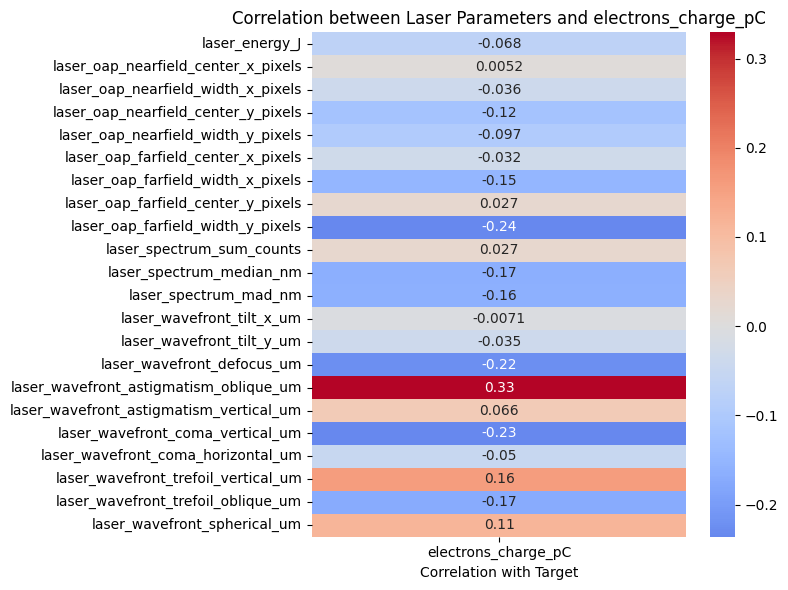

In [41]:

laser_features = [col for col in df.columns if 'laser_' in col]

# Choose the target
target = 'electrons_charge_pC' 

corr_matrix = df_filtered[laser_features + [target]].corr()

# Extract only correlations between laser parameters and the target
target_corr = corr_matrix[[target]].drop(index=target)

# ---- Step 3: Plot heatmap ----
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation between Laser Parameters and {target}')
plt.xlabel('Correlation with Target')
plt.tight_layout()
plt.show()

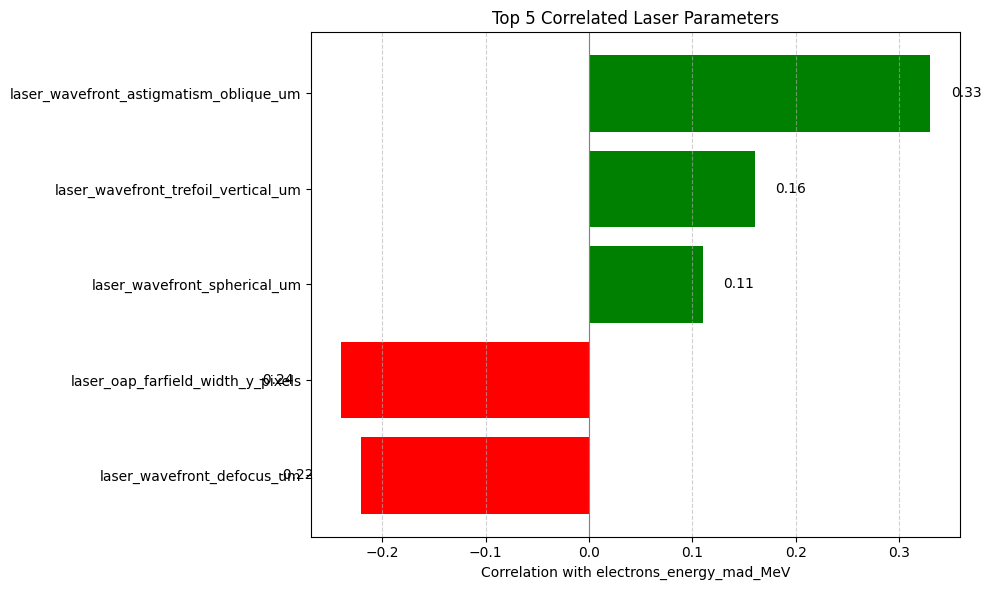

In [42]:
features = [
    'laser_wavefront_astigmatism_oblique_um',
    'laser_wavefront_trefoil_vertical_um',
    'laser_wavefront_spherical_um',
    'laser_oap_farfield_width_y_pixels',
    'laser_wavefront_defocus_um'
]

correlations = [0.33, 0.16, 0.11, -0.24, -0.22]

# Color code
colors = ['green' if val > 0 else 'red' for val in correlations]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(features, correlations, color=colors)
plt.xlabel('Correlation with electrons_energy_mad_MeV')
plt.title('Top 5 Correlated Laser Parameters')
plt.axvline(x=0, color='gray', linewidth=0.8)

# Annotate each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02 if width > 0 else width - 0.08,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}',
             va='center')

plt.tight_layout()
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.savefig("simplified_laser_correlation_chart.png")
plt.show()

 # Interpretation

### electrons_energy_median_MeV

Correlation with laser_wavefront_defocus_um is 0.80, meaning when defocus increases, the median electron energy tends to increase as well — a strong positive relationship.

Correlation with electrons_charge_pC is -0.649, meaning as electron energy increases, the charge tends to decrease — a strong negative relationship.

 1. electrons_energy_median_MeV vs laser_wavefront_defocus_um
Correlation = +0.773 (Strong positive)

What this means: When the laser wavefront defocus increases, the median energy of the resulting electron beam also increases.

Possible interpretation:

A certain amount of defocus might improve beam formation conditions, such as by influencing the plasma density gradient, focal volume, or self-injection threshold in the laser–plasma interaction.

However, too much defocus could be detrimental — so this strong correlation suggests that, within your dataset’s range, increasing defocus is beneficial for achieving higher energy electrons.

Conclusion: Defocus is one of the most influential laser parameters on electron beam energy.

2. electrons_energy_median_MeV vs electrons_charge_pC
Correlation = -0.649 (Strong negative)

What this means: Shots that produce higher-energy electrons tend to result in less total charge (fewer electrons).

Physical interpretation:

This is a well-known trade-off in laser-plasma acceleration:

You can either accelerate many electrons to moderate energy, or fewer electrons to high energy.

This may reflect beam loading effects, where too much charge in the plasma bubble can lower the accelerating field and reduce the final energy of the electrons.

Conclusion: There is a trade-off between energy and charge — optimizing for one may reduce the other.



### electrons_energy_mad_MeV
electrons_energy_median = -0.109
electrons_charge_pC = -0.125

 1. electrons_energy_median → Correlation = −0.109
Interpretation: There is a very weak negative correlation between the electron beam energy and its spread (MAD).

Implication: Slightly higher beam energies might correspond to a slightly more stable energy spread — but the relationship is so weak that it's likely not significant on its own.

Conclusion: Not a strong predictor of energy spread.

 2. electrons_charge_pC → Correlation = −0.125
Interpretation: There is a weak negative correlation between electron charge and energy MAD.

Implication: Slight tendency that shots with higher charge may have more stable (lower MAD) energy.

Conclusion: Again, weak enough that this feature alone is not sufficient to predict beam quality in terms of energy spread.



### electrons_charge_pC
electrons_energy_median = -0.65

What it means:
When the median energy of the electron beam increases, the charge tends to decrease — and vice versa.

Why it matters (physical insight):

This is a classic energy–charge trade-off in laser wakefield acceleration:

Higher energies are often achieved when fewer electrons are injected and accelerated.

When more charge is injected into the wake (bubble), it loads the plasma field, reducing the electric field strength and hence lowering the energy gain (this is called beam loading).

So, if you're trying to maximize both energy and charge, you need to find a balance in the laser-plasma conditions.

📊 Practical Implication
When designing or optimizing your laser system:

High energy shots are likely to produce low charge, and

High charge shots will likely have lower energy electrons.

In [43]:
#df_filtered.corr(numeric_only=True)

### Explain Shot-to-Shot Variations in Electron Energy
let's plot laser_wavefront_defocus_um against the 3 targets (electrons_energy_median_MeV, electrons_energy_mad_MeV, electrons_charge_pC)

### Quantitative check
it's when you use numbers and calculations to test whether your hypothesis or observation is actually correct, rather than just looking at it visually.

It quantifies how beam energy stability is affected by laser optical alignment (defocus).

In [45]:
# You could verify this by calculating:
energy_std = df_filtered['electrons_energy_median_MeV'].std()
defocus_std = df_filtered['laser_wavefront_defocus_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

Energy variation: ±12.7 MeV
Focus variation: ±0.007 μm
Sensitivity: 1905 MeV/μm


In [146]:
# You could verify this by calculating:
energy_std = df_filtered['electrons_energy_mad_MeV'].std()
defocus_std = df_filtered['laser_wavefront_defocus_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

Energy variation: ±3.8 MeV
Focus variation: ±0.007 μm
Sensitivity: 576 MeV/μm


Text(0.5, 1.0, 'Electron Energy mad vs Laser Wavefront Defocus')

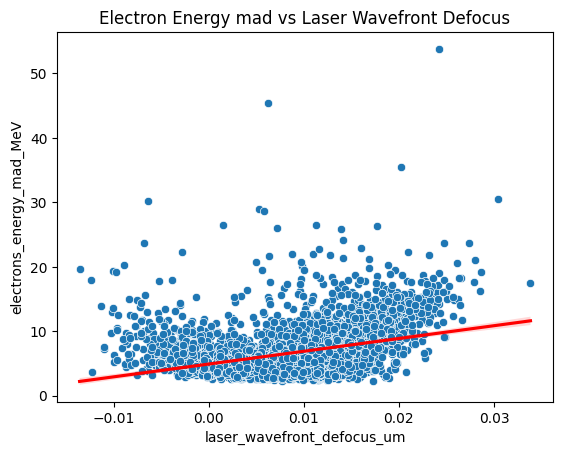

In [145]:
sns.scatterplot(x='laser_wavefront_defocus_um', y='electrons_energy_mad_MeV', data=df_filtered)
sns.regplot(data=df_filtered, x='laser_wavefront_defocus_um', y='electrons_energy_mad_MeV', scatter=False, color='red', label='Linear fit')
plt.title('Electron Energy mad vs Laser Wavefront Defocus')

In [ ]:
# You could verify this by calculating:
energy_std = df_filtered['electrons_charge_pC'].std()
defocus_std = df_filtered['laser_wavefront_defocus_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

Text(0.5, 1.0, 'electrons charge vs Laser Wavefront Defocus')

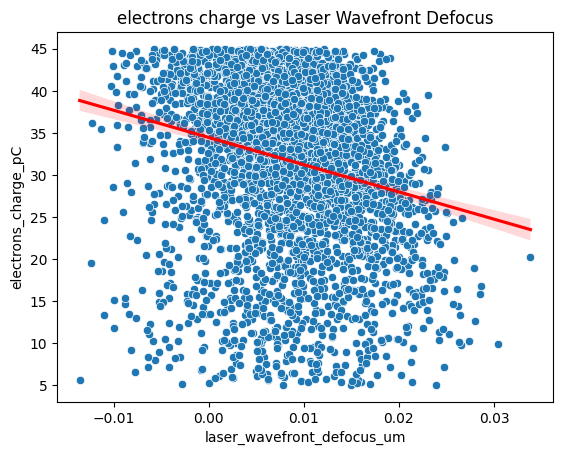

In [147]:
sns.scatterplot(x='laser_wavefront_defocus_um', y='electrons_charge_pC', data=df_filtered)
sns.regplot(data=df_filtered, x='laser_wavefront_defocus_um', y='electrons_charge_pC', scatter=False, color='red', label='Linear fit')
plt.title('electrons charge vs Laser Wavefront Defocus')

In [ ]:
#sns.heatmap(df.isnull())

In [ ]:
######################################################################################################"
######################################################################################################
#######################################################################################################

### B. Visualize Target Distribution

In [46]:
""" what can it tell us 
See if it's:

Normally distributed

Has outliers (extreme low/high energy shots) """

" what can it tell us \nSee if it's:\n\nNormally distributed\n\nHas outliers (extreme low/high energy shots) "

<Axes: xlabel='electrons_energy_median_MeV', ylabel='Count'>

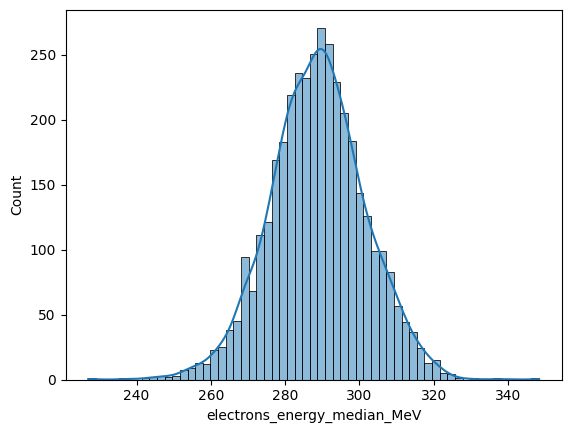

In [47]:
sns.histplot(df_filtered['electrons_energy_median_MeV'], kde=True)

<Axes: xlabel='electrons_energy_median_MeV'>

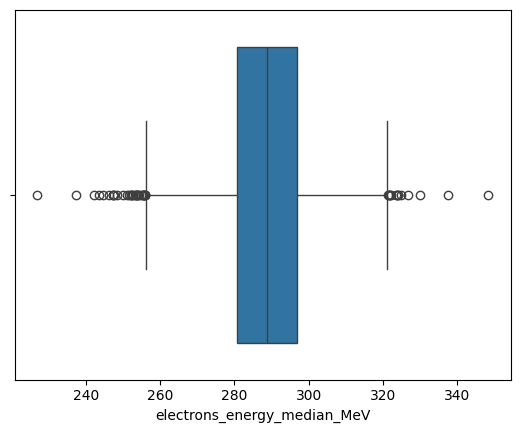

In [48]:
sns.boxplot(x=df_filtered['electrons_energy_median_MeV'])

<Axes: xlabel='electrons_energy_mad_MeV', ylabel='Count'>

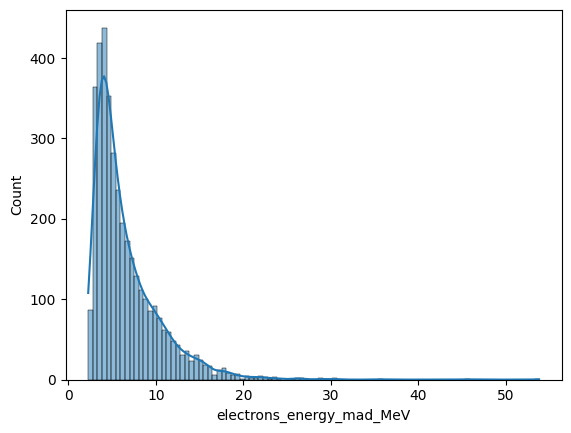

In [114]:
sns.histplot(df_filtered['electrons_energy_mad_MeV'], kde=True)

<Axes: xlabel='electrons_energy_mad_MeV'>

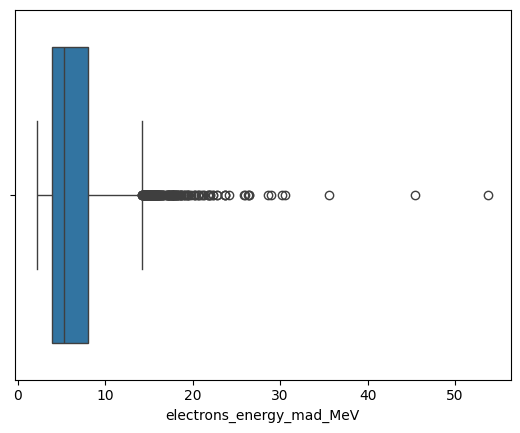

In [115]:
sns.boxplot(x=df_filtered['electrons_energy_mad_MeV'])

<Axes: xlabel='electrons_charge_pC', ylabel='Count'>

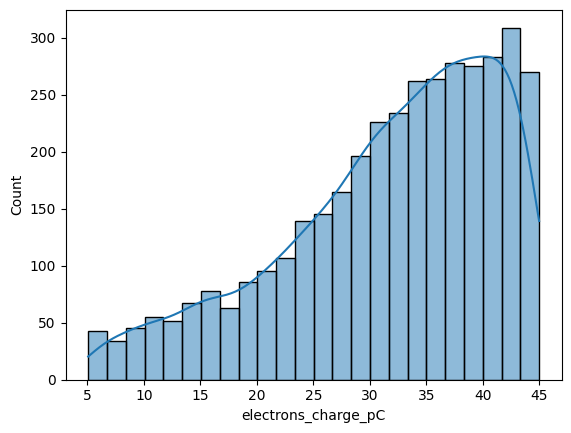

In [116]:
sns.histplot(df_filtered['electrons_charge_pC'], kde=True)

<Axes: xlabel='electrons_charge_pC'>

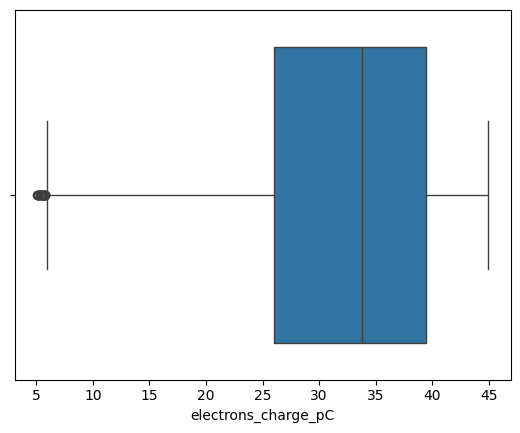

In [117]:
sns.boxplot(x=df_filtered['electrons_charge_pC'])

In [ ]:
##############################################################################################
##############################################################################################
###############################################################################################

### D. Scatter Plots for Key Parameters
For the top 3-5 correlated laser features:
top 3 Strongest correlations versus electrons_energy_median_MeV :

Look for patterns:

Linear or non-linear relations?

Trends, clusters, or bifurcations?

1-laser_wavefront_defocus_um
2-laser_oap_nearfield_width_x_pixels
3-laser_oap_nearfield_width_y_pixels



<Axes: xlabel='laser_oap_nearfield_width_y_pixels', ylabel='electrons_energy_median_MeV'>

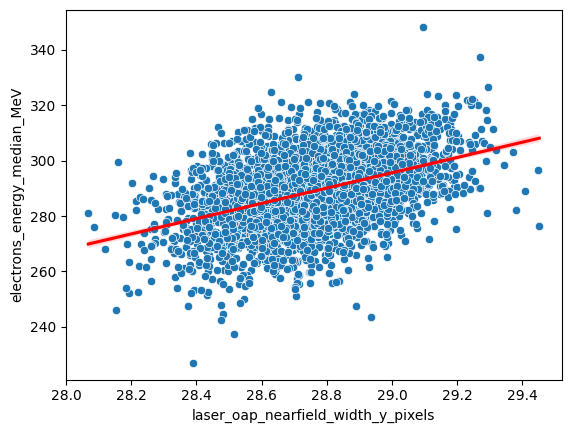

In [148]:
sns.scatterplot(x='laser_oap_nearfield_width_y_pixels', y='electrons_energy_median_MeV', data=df_filtered)
sns.regplot(data=df_filtered, x='laser_oap_nearfield_width_y_pixels', y='electrons_energy_median_MeV', scatter=False, color='red', label='Linear fit')

<Axes: xlabel='laser_oap_nearfield_width_x_pixels', ylabel='electrons_energy_median_MeV'>

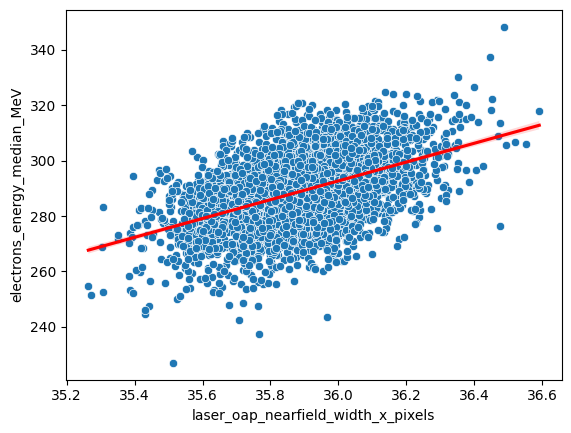

In [149]:
sns.scatterplot(x='laser_oap_nearfield_width_x_pixels', y='electrons_energy_median_MeV', data=df_filtered)
# Add linear regression line
sns.regplot(data=df_filtered, x='laser_oap_nearfield_width_x_pixels', y='electrons_energy_median_MeV', scatter=False, color='red', label='Linear fit')

# Add lowess curve for non-linear trend
#sns.regplot(data=df_filtered, x='laser_oap_nearfield_width_x_pixels', y='electrons_energy_median_MeV', scatter=False, lowess=True, color='green', label='Lowess fit')

<Axes: xlabel='laser_wavefront_defocus_um', ylabel='electrons_energy_median_MeV'>

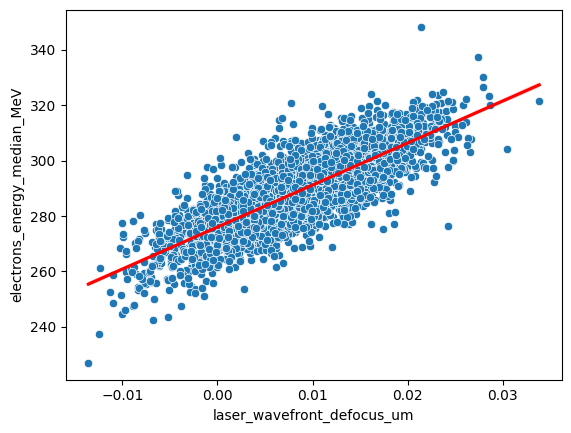

In [150]:
sns.scatterplot(x='laser_wavefront_defocus_um', y='electrons_energy_median_MeV', data=df_filtered)
# Add linear regression line
sns.regplot(data=df_filtered, x='laser_wavefront_defocus_um', y='electrons_energy_median_MeV', scatter=False, color='red', label='Linear fit')

<Axes: xlabel='laser_wavefront_defocus_um', ylabel='electrons_energy_mad_MeV'>

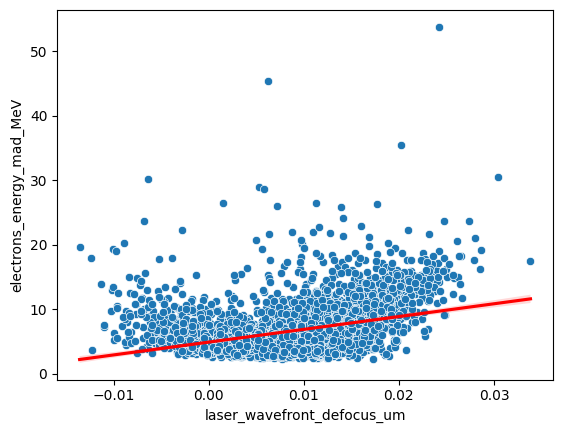

In [151]:
sns.scatterplot(x='laser_wavefront_defocus_um', y='electrons_energy_mad_MeV', data=df_filtered)
# Add linear regression line
sns.regplot(data=df_filtered, x='laser_wavefront_defocus_um', y='electrons_energy_mad_MeV', scatter=False, color='red', label='Linear fit')

In [ ]:
################################################################################################################
################################################################################################################

### E. Time Series Behavior 

check autocorrelations:
the goal here is know about the shot-to-shot drift or trends over time. 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

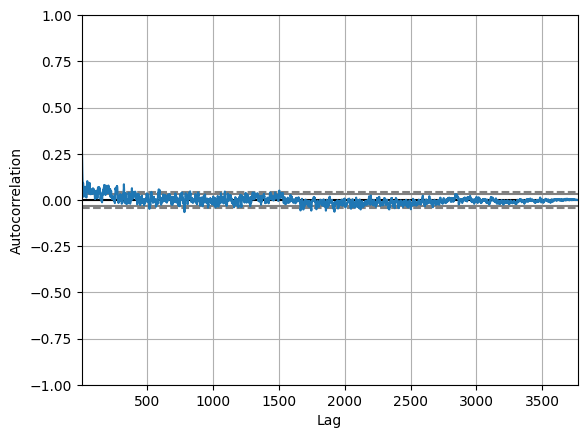

In [49]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_filtered['electrons_energy_median_MeV'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

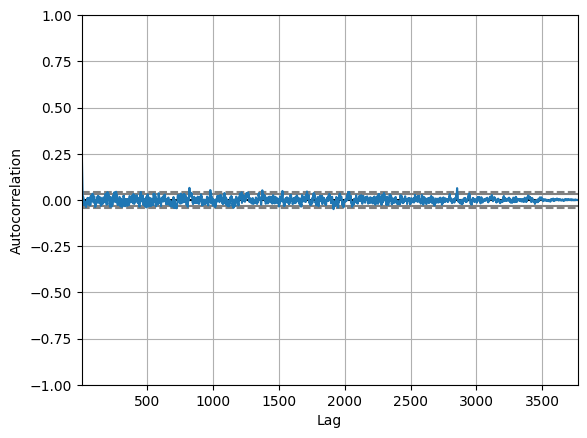

In [50]:
autocorrelation_plot(df_filtered['electrons_energy_mad_MeV'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

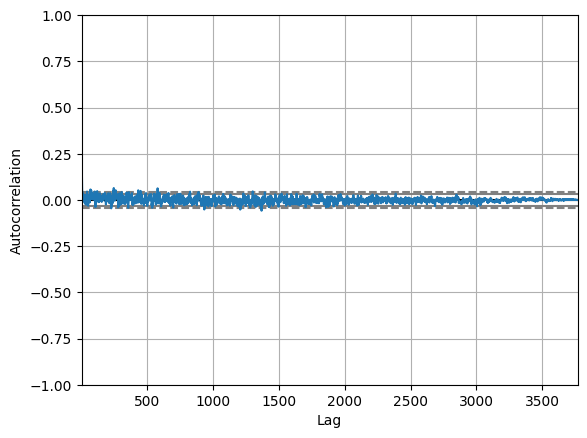

In [51]:
autocorrelation_plot(df_filtered['electrons_charge_pC'])

In [52]:
################################################################################################################
################################################################################################################

In [55]:
#print(df_filtered.head())

In [56]:
print("Original df:", df.shape)
print("Filtered df:", df_filtered.shape)

Original df: (5205, 26)
Filtered df: (3770, 26)


In [57]:
numeric_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()

Q1 = df_filtered[numeric_cols].quantile(0.25)
Q3 = df_filtered[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_filtered[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_filtered[numeric_cols] > (Q3 + 1.5 * IQR))
df_outliers = df_filtered[outlier_mask.any(axis=1)]
#print(f"Outliers detected using IQR: {len(df_filtered_outliers)}")
print(f"Outliers detected using IQR: {len(df_outliers)}")

Outliers detected using IQR: 706


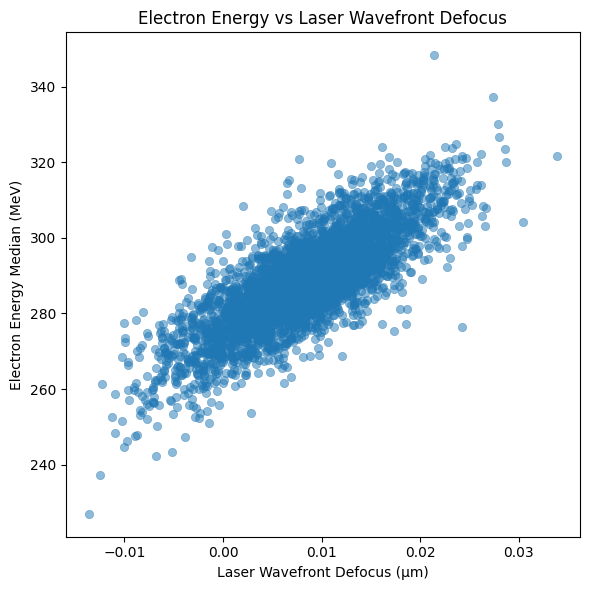

In [58]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_filtered, 
                x='laser_wavefront_defocus_um', 
                y='electrons_energy_median_MeV',
                alpha=0.5, edgecolor=None)
plt.title('Electron Energy vs Laser Wavefront Defocus')
plt.xlabel('Laser Wavefront Defocus (μm)')
plt.ylabel('Electron Energy Median (MeV)')
plt.tight_layout()
plt.show()

<Axes: xlabel='electrons_energy_median_MeV', ylabel='Count'>

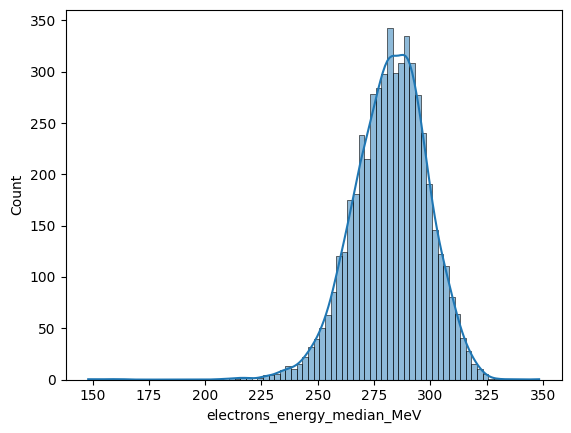

In [59]:
sns.histplot(df['electrons_energy_median_MeV'], kde=True)

<Axes: xlabel='electrons_energy_median_MeV', ylabel='Count'>

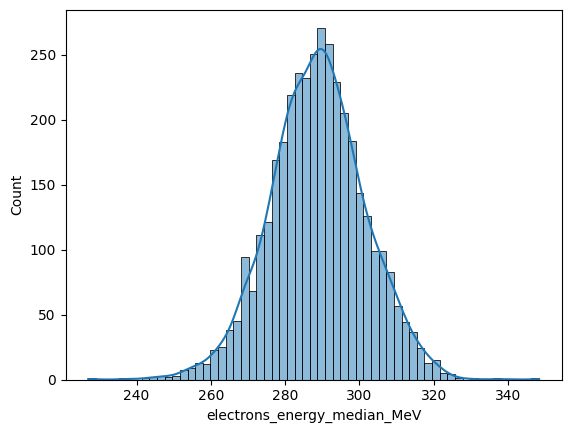

In [60]:
sns.histplot(df_filtered['electrons_energy_median_MeV'], kde=True)

<Axes: xlabel='electrons_charge_pC', ylabel='Count'>

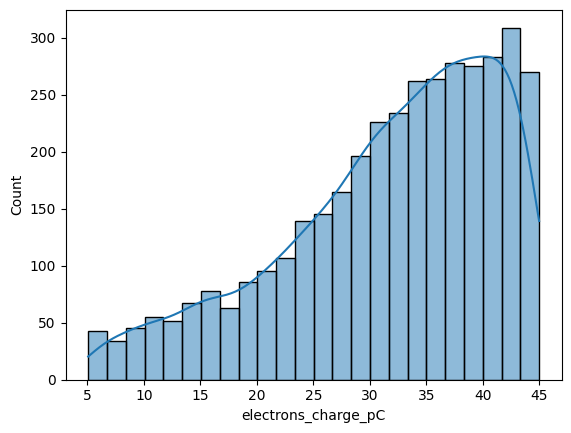

In [61]:
sns.histplot(df_filtered['electrons_charge_pC'], kde=True)

<Axes: xlabel='electrons_energy_mad_MeV', ylabel='Count'>

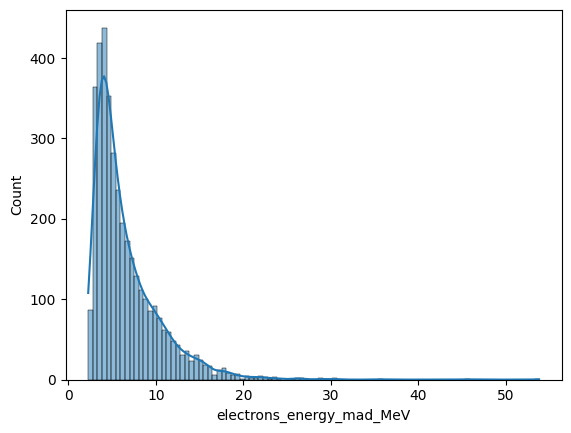

In [62]:
sns.histplot(df_filtered['electrons_energy_mad_MeV'], kde=True)

In [63]:
#####################################################################################################

### laser_wavefront_defocus_um  vs  targets

In [64]:
# You could verify this by calculating
#This calculates the standard deviation (σ) of the electron beam energy (median) across all shots.
#It tells how much the energy varies from shot to shot 
energy_std = df_filtered['electrons_energy_median_MeV'].std()

#This computes the standard deviation of the laser wavefront defocus, which is one of the laser parameters that can fluctuate.
#It shows how much the laser's defocus varies over time.
defocus_std = df_filtered['laser_wavefront_defocus_um'].std()

#This calculates how sensitive the beam energy is to changes in defocus.
#Units are MeV/μm: how many MeV of energy change do you get per micrometer of laser defocus variation?
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

Energy variation: ±12.7 MeV
Focus variation: ±0.007 μm
Sensitivity: 1905 MeV/μm


In [65]:
"""Interpretation:
1. Large energy variation (±11.5 MeV):
This indicates a significant shot-to-shot jitter in the median electron energy.
It is worth investigating what’s driving it.
2. Small focus variation (±0.006 μm):
The laser wavefront defocus is very stable — small variation across shots.
But despite being small, it has a big impact (see next point).
3. Very high sensitivity (1933 MeV/μm):
This means small defocus changes cause large energy shifts.
Example: a tiny defocus change of just 0.001 μm could shift energy by ~2 MeV.
So, even if defocus is not changing much, it might still be responsible for a large portion of the energy jitter."""


"""Why this is useful in my analysis:
It quantifies how beam energy stability is affected by laser optical alignment (defocus).
Helps me identify whether tight control of laser wavefront is essential for minimizing energy jitter.
If you compare sensitivity to other features (like nearfield width, pulse energy, etc.), you can prioritize which laser parameter matters most."""

'Why this is useful in your analysis:\nIt quantifies how beam energy stability is affected by laser optical alignment (defocus).\nHelps you identify whether tight control of laser wavefront is essential for minimizing energy jitter.\nIf you compare sensitivity to other features (like nearfield width, pulse energy, etc.), you can prioritize which laser parameter matters most.'

In [66]:
# shap

In [67]:
# You could verify this by calculating:
energy_std = df_filtered['electrons_charge_pC'].std()
defocus_std = df_filtered['laser_wavefront_defocus_um'].std()
sensitivity = energy_std / defocus_std  # pC per μm

print(f"charge variation: ±{energy_std:.1f} pC")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} pC/μm")

charge variation: ±9.6 pC
Focus variation: ±0.007 μm
Sensitivity: 1442 pC/μm


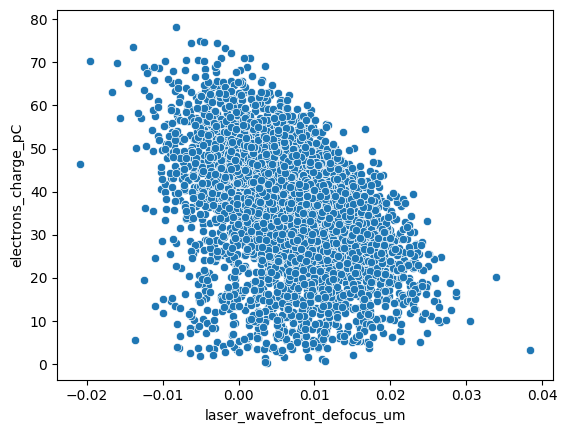

In [68]:
sns.scatterplot(data=df, x='laser_wavefront_defocus_um', y='electrons_charge_pC')
plt.show()

In [70]:
energy_std = df_filtered['electrons_energy_mad_MeV'].std()
defocus_std = df_filtered['laser_wavefront_defocus_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

Energy variation: ±3.8 MeV
Focus variation: ±0.007 μm
Sensitivity: 576 MeV/μm


In [71]:
df_filtered[['electrons_energy_median_MeV', 'laser_wavefront_astigmatism_oblique_um']].corr()

electrons_energy_median_MeV  \
electrons_energy_median_MeV                                1.000000   
laser_wavefront_astigmatism_oblique_um                     0.231991   

                                        laser_wavefront_astigmatism_oblique_um  
electrons_energy_median_MeV                                           0.231991  
laser_wavefront_astigmatism_oblique_um                                1.000000

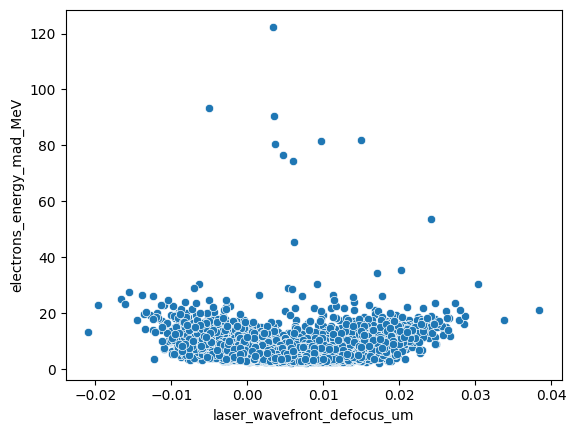

In [153]:
sns.scatterplot(data=df, x='laser_wavefront_defocus_um', y='electrons_energy_mad_MeV')
plt.show()

## laser_oap_nearfield_width_x_pixels

In [ ]:
pixel_to_um = 2.0  

energy_std = df_filtered['electrons_energy_mad_MeV'].std()
defocus_um = df_filtered['laser_oap_nearfield_width_x_pixels'] * pixel_to_um
defocus_std = defocus_um.std()
sensitivity = energy_std / defocus_std  # Now properly in MeV/μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} pixel") 
print(f"Sensitivity: {sensitivity:.0f} MeV/pixel")

In [ ]:
energy_std = df_filtered['electrons_energy_median_MeV'].std()
focus_std_pixels = df_filtered['laser_oap_nearfield_width_x_pixels'].std()
sensitivity = energy_std / focus_std_pixels  # MeV per pixel

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{focus_std_pixels:.3f} pixels")
print(f"Sensitivity: {sensitivity:.0f} MeV/pixel")

In [ ]:
energy_std = df_filtered['electrons_charge_pC'].std()
defocus_std = df_filtered['laser_oap_nearfield_width_x_pixels'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"charge variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/pixel")

In [ ]:
df_filtered[['electrons_energy_median_MeV', 'laser_oap_nearfield_width_x_pixels']].corr()

## laser_oap_nearfield_width_y_pixels

In [ ]:
energy_std = df_filtered['electrons_energy_median_MeV'].std()
defocus_std = df_filtered['laser_oap_nearfield_width_y_pixels'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
#######################################################"
#######################################################"

In [ ]:
energy_std = df_filtered['electrons_energy_median_MeV'].std()
defocus_std = df_filtered['laser_wavefront_astigmatism_oblique_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
#################################

In [ ]:
energy_std = df_filtered['electrons_energy_median_MeV'].std()
defocus_std = df_filtered['laser_energy_J'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
#################################

In [ ]:
energy_std = df_filtered['electrons_energy_mad_MeV'].std()
defocus_std = df_filtered['laser_wavefront_astigmatism_oblique_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
energy_std = df_filtered['electrons_charge_pC'].std()
defocus_std = df_filtered['laser_wavefront_astigmatism_oblique_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
#sns.scatterplot(x='laser_wavefront_astigmatism_oblique_um', y='electrons_energy_median_MeV', data=df_filtered)
# Add linear regression line
#sns.regplot(data=df_filtered, x='laser_wavefront_astigmatism_oblique_um', y='electrons_energy_median_MeV', scatter=False, color='red', label='Linear fit')

In [ ]:
#df_filtered[['electrons_energy_median_MeV', 'laser_wavefront_astigmatism_oblique_um']].corr()

In [ ]:
#df_filtered[['electrons_charge_pC', 'laser_wavefront_astigmatism_oblique_um']].corr()

In [ ]:
#df_filtered[['electrons_energy_mad_MeV', 'laser_wavefront_astigmatism_oblique_um']].corr()

In [ ]:
#######################################################
#######################################################

In [ ]:
#sns.lmplot(x='laser_wavefront_defocus_um', y='electrons_energy_median_MeV', data=df)
#plt.title("Energy vs Defocus")
#plt.show()

In [ ]:
energy_std = df_filtered['electrons_charge_pC'].std()
defocus_std = df_filtered['laser_wavefront_astigmatism_oblique_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
energy_std = df_filtered['electrons_energy_mad_MeV'].std()
defocus_std = df_filtered['laser_oap_nearfield_width_y_pixels'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
energy_std = df_filtered['electrons_energy_mad_MeV'].std()
defocus_std = df_filtered['laser_wavefront_astigmatism_oblique_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
energy_std = df_filtered['electrons_charge_pC'].std()
defocus_std = df_filtered['laser_oap_nearfield_width_y_pixels'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
energy_std = df_filtered['electrons_charge_pC'].std()
defocus_std = df_filtered['laser_wavefront_astigmatism_oblique_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

In [ ]:
#####################################################################################################

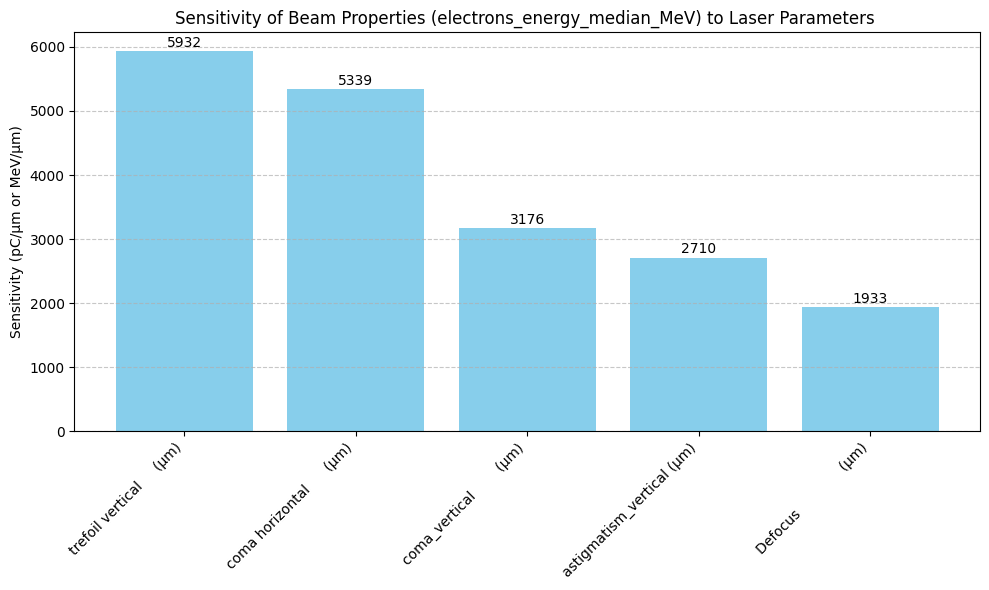

In [72]:
# Example sensitivities (this numbers come from the actuel calculation) 
sensitivity_dict = {
    'Defocus              (μm)' : 1933,
    'astigmatism_vertical (μm)' : 2710,
    'trefoil vertical     (μm)' : 5932,
    'coma horizontal      (μm)' : 5339,   
    'coma_vertical        (μm)' : 3176,
}

# Convert to DataFrame for easy plotting
df_sensitivity = pd.DataFrame.from_dict(sensitivity_dict, orient='index', columns=['Sensitivity'])
df_sensitivity = df_sensitivity.sort_values(by='Sensitivity', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sensitivity.index, df_sensitivity['Sensitivity'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sensitivity (pC/μm or MeV/μm)')
plt.title('Sensitivity of Beam Properties (electrons_energy_median_MeV) to Laser Parameters ')

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

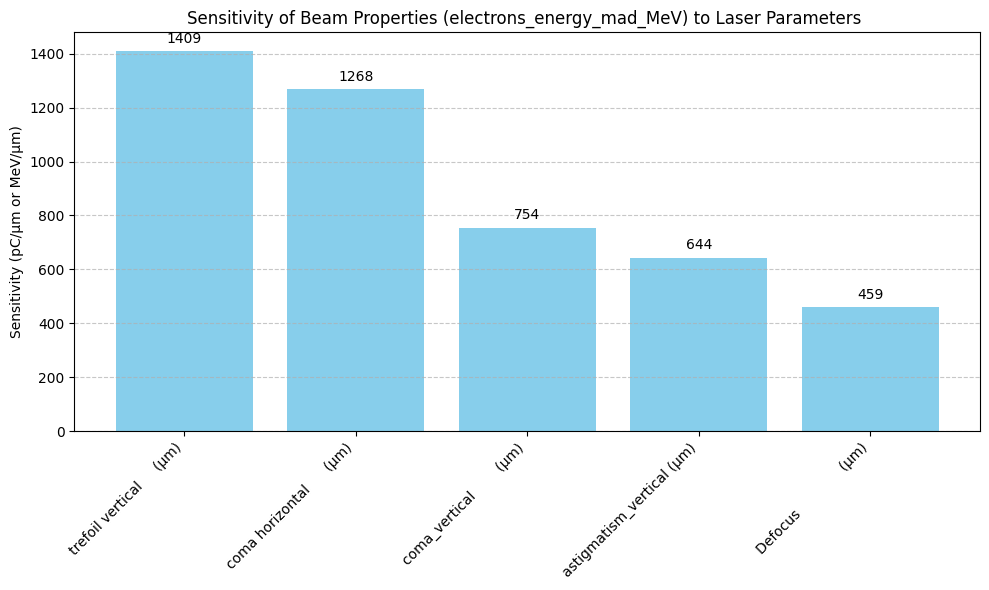

In [73]:
# Example sensitivities (replace with your actual calculations)
sensitivity_dict = {
    'Defocus              (μm)' : 459,
    'astigmatism_vertical (μm)' : 644,
    'trefoil vertical     (μm)' : 1409,
    'coma horizontal      (μm)' : 1268,
    'coma_vertical        (μm)' : 754,
    
    
}

# Convert to DataFrame for easy plotting
df_sensitivity = pd.DataFrame.from_dict(sensitivity_dict, orient='index', columns=['Sensitivity'])
df_sensitivity = df_sensitivity.sort_values(by='Sensitivity', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sensitivity.index, df_sensitivity['Sensitivity'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sensitivity (pC/μm or MeV/μm)')
plt.title('Sensitivity of Beam Properties (electrons_energy_mad_MeV) to Laser Parameters ')

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

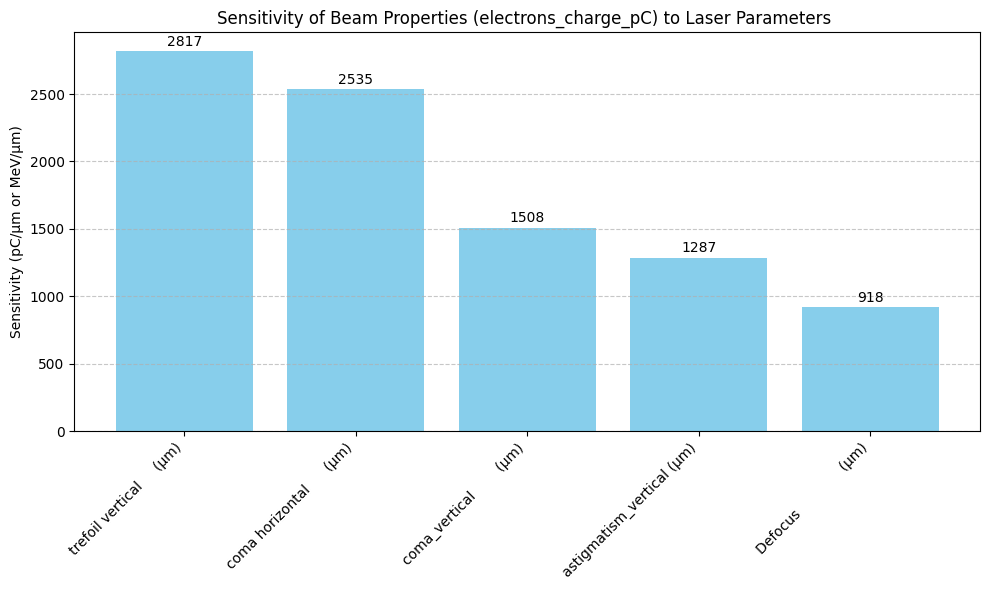

In [74]:
# Example sensitivities (replace with your actual calculations)
sensitivity_dict = {
    'Defocus              (μm)' : 918,
    'astigmatism_vertical (μm)' : 1287,
    'trefoil vertical     (μm)' : 2817,
    'coma horizontal      (μm)' : 2535,
    'coma_vertical        (μm)' : 1508,
    
    
}

# Convert to DataFrame for easy plotting
df_sensitivity = pd.DataFrame.from_dict(sensitivity_dict, orient='index', columns=['Sensitivity'])
df_sensitivity = df_sensitivity.sort_values(by='Sensitivity', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_sensitivity.index, df_sensitivity['Sensitivity'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sensitivity (pC/μm or MeV/μm)')
plt.title('Sensitivity of Beam Properties (electrons_charge_pC) to Laser Parameters ')

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [76]:
#####################################################################################################

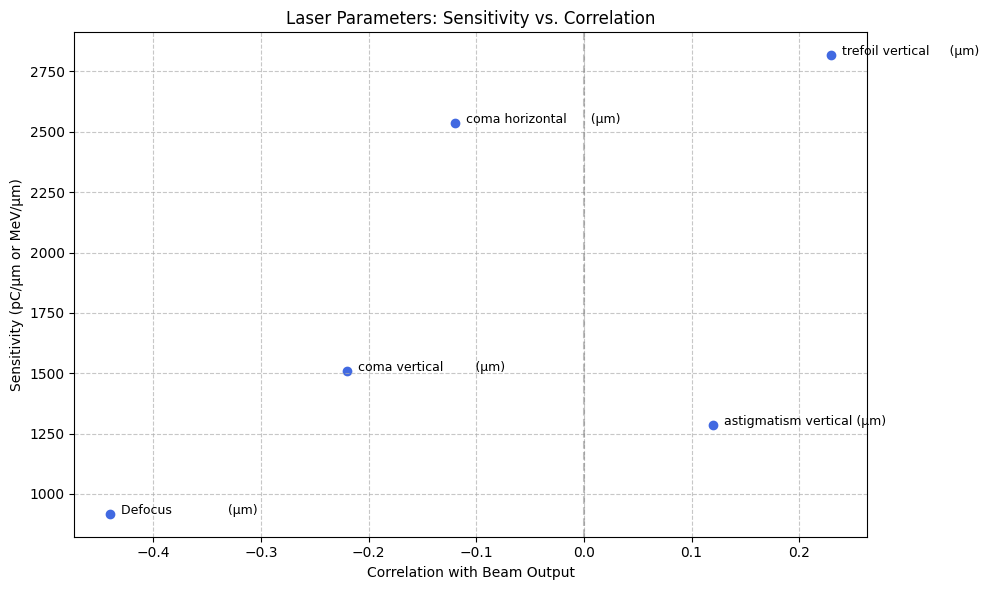

In [77]:

# Electron charge pC
data = {
    'Parameter': [
        'Defocus              (μm)',
        'astigmatism vertical (μm)',
        'trefoil vertical     (μm)',
        'coma horizontal      (μm)',
        'coma vertical        (μm)',
    
    ],
    'Sensitivity': [918, 1287, 2817, 2535, 1508],
    'Correlation': [-0.44, 0.12, 0.23, -0.12, -0.22]  # Replace with your correlation values
}

df = pd.DataFrame(data)

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Correlation'], df['Sensitivity'], color='royalblue')

# Annotate each point with parameter name
for i in range(len(df)):
    plt.text(df['Correlation'][i] + 0.01, df['Sensitivity'][i], df['Parameter'][i], fontsize=9)

plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Correlation with Beam Output')
plt.ylabel('Sensitivity (pC/μm or MeV/μm)')
plt.title('Laser Parameters: Sensitivity vs. Correlation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

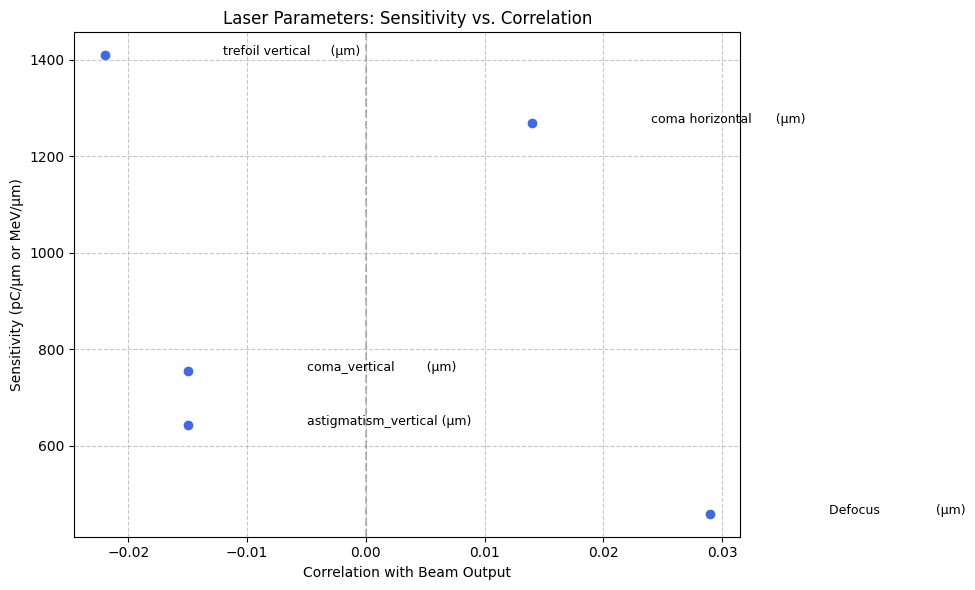

In [78]:
# Sample data: replace with your real values
# electrons_energy_mad_MeV
data = {
    'Parameter': [
        'Defocus              (μm)',
        'astigmatism_vertical (μm)',
        'trefoil vertical     (μm)',
        'coma horizontal      (μm)',
        'coma_vertical        (μm)',
    
    ],
    'Sensitivity': [459, 644, 1409, 1268, 754 ],
    'Correlation': [0.029, -0.015, -0.022, 0.014, -0.015]  # Replace with your correlation values
}

df = pd.DataFrame(data)

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Correlation'], df['Sensitivity'], color='royalblue')

# Annotate each point with parameter name
for i in range(len(df)):
    plt.text(df['Correlation'][i] + 0.01, df['Sensitivity'][i], df['Parameter'][i], fontsize=9)

plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Correlation with Beam Output')
plt.ylabel('Sensitivity (pC/μm or MeV/μm)')
plt.title('Laser Parameters: Sensitivity vs. Correlation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

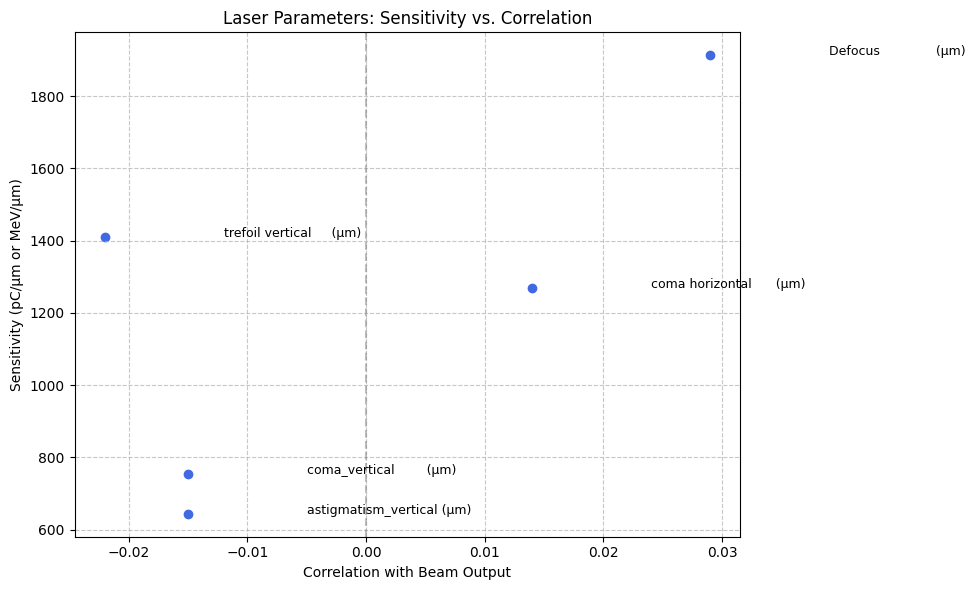

In [79]:
# electrons_energy_median_MeV
data = {
    'Parameter': [
        'Defocus              (μm)',
        'astigmatism_vertical (μm)',
        'trefoil vertical     (μm)',
        'coma horizontal      (μm)',
        'coma_vertical        (μm)',
    
    ],
    'Sensitivity': [1913, 644, 1409, 1268, 754 ],
    'Correlation': [0.029, -0.015, -0.022, 0.014, -0.015]  # Replace with your correlation values
}

df = pd.DataFrame(data)

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Correlation'], df['Sensitivity'], color='royalblue')

# Annotate each point with parameter name
for i in range(len(df)):
    plt.text(df['Correlation'][i] + 0.01, df['Sensitivity'][i], df['Parameter'][i], fontsize=9)

plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Correlation with Beam Output')
plt.ylabel('Sensitivity (pC/μm or MeV/μm)')
plt.title('Laser Parameters: Sensitivity vs. Correlation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

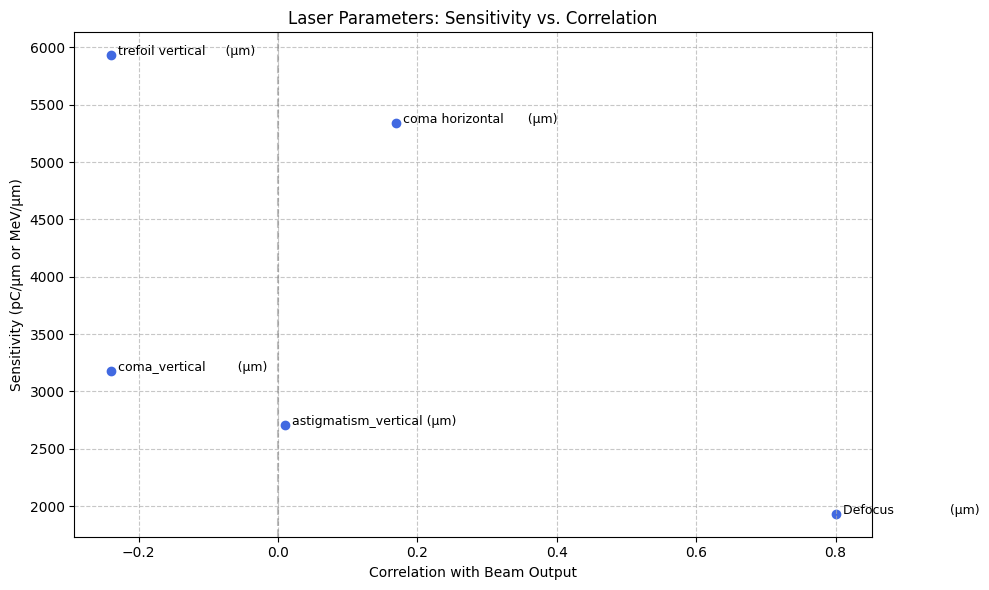

In [154]:
# electrons_energy_median_MeV
data = {
    'Parameter': [
        'Defocus              (μm)',
        'astigmatism_vertical (μm)',   
        'trefoil vertical     (μm)',
        'coma horizontal      (μm)',
        'coma_vertical        (μm)',
    
    ],
    'Sensitivity': [1933, 2710, 5932, 5339, 3176 ],
    'Correlation': [0.8, 0.0096, -0.24, 0.17, -0.24]  # Replace with your correlation values
}

df = pd.DataFrame(data)

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Correlation'], df['Sensitivity'], color='royalblue')

# Annotate each point with parameter name
for i in range(len(df)):
    plt.text(df['Correlation'][i] + 0.01, df['Sensitivity'][i], df['Parameter'][i], fontsize=9)

plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Correlation with Beam Output')
plt.ylabel('Sensitivity (pC/μm or MeV/μm)')
plt.title('Laser Parameters: Sensitivity vs. Correlation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [81]:
energy_std = df_filtered['electrons_energy_median_MeV'].std()
defocus_std = df_filtered['laser_wavefront_coma_vertical_um'].std()
sensitivity = energy_std / defocus_std  # MeV per μm

print(f"Energy variation: ±{energy_std:.1f} MeV")
print(f"Focus variation: ±{defocus_std:.3f} μm") 
print(f"Sensitivity: {sensitivity:.0f} MeV/μm")

Energy variation: ±12.7 MeV
Focus variation: ±0.004 μm
Sensitivity: 3314 MeV/μm


In [84]:
#####################################################################################################

### F. Predictive Modeling
Try to predict electron energy using laser parameters.

In [87]:
##################################################################################################

### Task 1: Predict Electron Beam Properties from Laser Parameters

This is a classic supervised regression problem.

Objective:
Predict quantities like:

electrons_energy_median_MeV

electrons_charge_pC

electrons_energy_mad_MeV
...using input features like:

laser_wavefront_defocus_um

laser_wavefront_tilt_x_um

laser_oap_nearfield_width_x_pixels, etc.

Use regression models: XGBoost, RandomForestRegressor, or LinearRegression

For multiple outputs: use MultiOutputRegressor

It trains a model to predict beam properties from laser parameters.

In [89]:
#pip install xgboost

In [ ]:
#X.info()

### D-Model Building

###  xgboost model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [198]:
X = df_filtered[[
    'laser_energy_J', 'laser_oap_nearfield_center_x_pixels',
    'laser_oap_nearfield_width_x_pixels', 'laser_oap_nearfield_center_y_pixels',
    'laser_oap_nearfield_width_y_pixels', 'laser_oap_farfield_center_x_pixels',
    'laser_oap_farfield_center_y_pixels', 'laser_oap_farfield_width_y_pixels',
    'laser_spectrum_sum_counts', 'laser_spectrum_median_nm',
    'laser_spectrum_mad_nm', 'laser_wavefront_tilt_x_um',
    'laser_wavefront_tilt_y_um', 'laser_wavefront_defocus_um',
    'laser_wavefront_astigmatism_oblique_um',
    'laser_wavefront_astigmatism_vertical_um',
    'laser_wavefront_coma_vertical_um', 'laser_wavefront_coma_horizontal_um',
    'laser_wavefront_trefoil_vertical_um',
    'laser_wavefront_trefoil_oblique_um', 'laser_wavefront_spherical_um'
]]

Y = df_filtered[[
    'electrons_energy_median_MeV',
    'electrons_energy_mad_MeV',
    'electrons_charge_pC'
]]    

In [199]:
# --------- Preprocessing ---------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [200]:
# --------- Train/Test Split ---------
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, shuffle=False
)

In [201]:
# --------- Model Training ---------
xgb = XGBRegressor(
    n_estimators=200,  # 
    max_depth=6,       
    learning_rate=0.05, 
    random_state=42
)
model = MultiOutputRegressor(xgb)
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [202]:
# --------- Predictions & Evaluation ---------
Y_pred = model.predict(X_test)

for i, column in enumerate(Y.columns):
    mse = mean_squared_error(Y_test[column], Y_pred[:, i])
    r2 = r2_score(Y_test[column], Y_pred[:, i])
    print(f"{column}:")
    print(f"  R² = {r2:.3f}")
    print(f"  MSE = {mse:.3f}\n")

electrons_energy_median_MeV:
  R² = 0.717
  MSE = 45.115

electrons_energy_mad_MeV:
  R² = 0.464
  MSE = 10.040

electrons_charge_pC:
  R² = 0.435
  MSE = 55.370



In [203]:
# --------- Forecasting Next Shot ---------
X_input = X_scaled[-1].reshape(1, -1)  # Shape: (1, n_features)
predicted_next = model.predict(X_input)

print("\nForecasted next shot:")
for col, val in zip(Y.columns, predicted_next[0]):
    print(f"  {col}: {val:.2f}")


Forecasted next shot:
  electrons_energy_median_MeV: 298.68
  electrons_energy_mad_MeV: 7.25
  electrons_charge_pC: 30.93


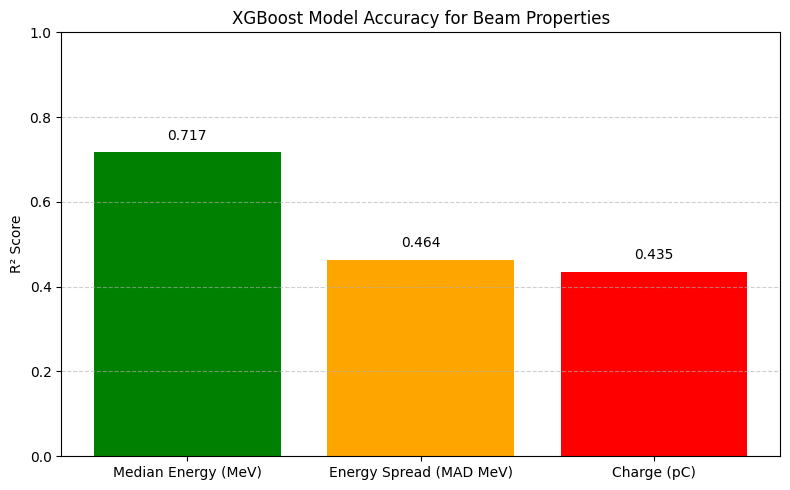

In [104]:
targets = ['Median Energy (MeV)', 'Energy Spread (MAD MeV)', 'Charge (pC)']
r2_scores = [0.717, 0.464, 0.435]

plt.figure(figsize=(8,5))
bars = plt.bar(targets, r2_scores, color=['green', 'orange', 'red'])
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.title("XGBoost Model Accuracy for Beam Properties")

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.03, f"{yval:.3f}", ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#I am forecasting three beam parameters and checking if the predicted values are physically reasonable by comparing them with historical distributions.
#It shows where the prediction lies relative to the historical distribution and confidence band

C:\Users\marcl\AppData\Local\Temp\ipykernel_3324\2929730609.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


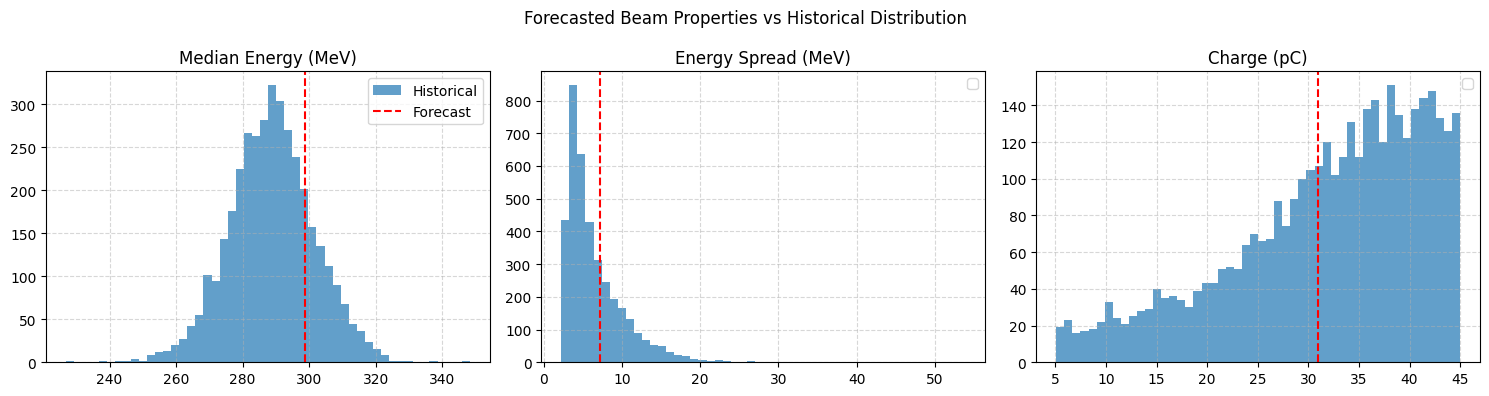

In [105]:

# Historical values (real data)
energy_real = df_filtered['electrons_energy_median_MeV']
spread_real = df_filtered['electrons_energy_mad_MeV']
charge_real = df_filtered['electrons_charge_pC']

# Forecasts
forecast = {
    'Energy': 298.68,
    'Spread': 7.25,
    'Charge': 30.93
}

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].hist(energy_real, bins=50, alpha=0.7, label='Historical')
axs[0].axvline(forecast['Energy'], color='red', linestyle='--', label='Forecast')
axs[0].set_title('Median Energy (MeV)')

axs[1].hist(spread_real, bins=50, alpha=0.7)
axs[1].axvline(forecast['Spread'], color='red', linestyle='--')
axs[1].set_title('Energy Spread (MeV)')

axs[2].hist(charge_real, bins=50, alpha=0.7)
axs[2].axvline(forecast['Charge'], color='red', linestyle='--')
axs[2].set_title('Charge (pC)')

for ax in axs:
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Forecasted Beam Properties vs Historical Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# let's divide it 

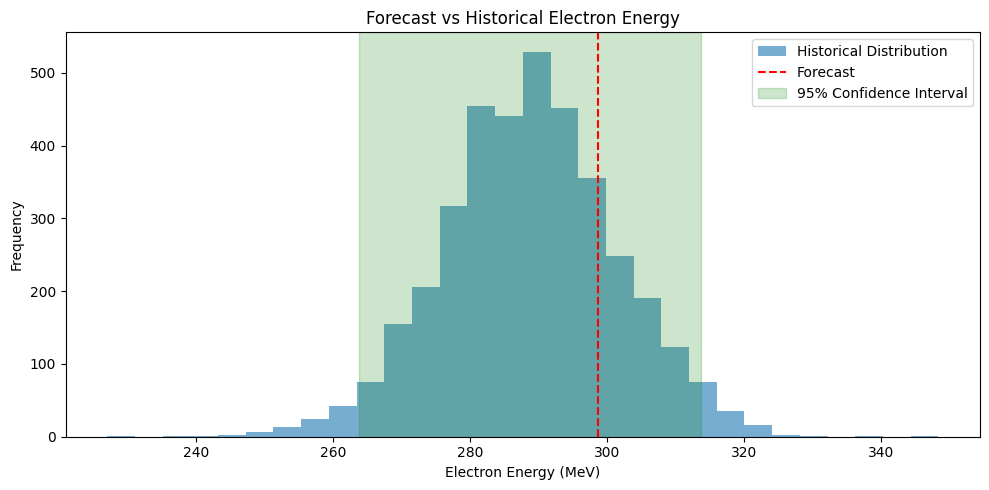

Forecast is within expected range.


In [182]:
# historical values and a new forecast
historical = df_filtered['electrons_energy_median_MeV'].values
forecast = 298.68  # your predicted value

# Compute 95% confidence interval 
# I take 95% assuming normality 
std = np.std(historical)
ci_low, ci_high = mean - 1.96 * std, mean + 1.96 * std

# Plot
plt.figure(figsize=(10, 5))
plt.hist(historical, bins=30, alpha=0.6, label='Historical Distribution')
plt.axvline(forecast, color='red', linestyle='--', label='Forecast')
plt.axvspan(ci_low, ci_high, color='green', alpha=0.2, label='95% Confidence Interval')
plt.title('Forecast vs Historical Electron Energy')
plt.xlabel('Electron Energy (MeV)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

#check
if forecast < ci_low or forecast > ci_high:
    print("Forecast is a statistical outlier.")
else:
    print("Forecast is within expected range.")

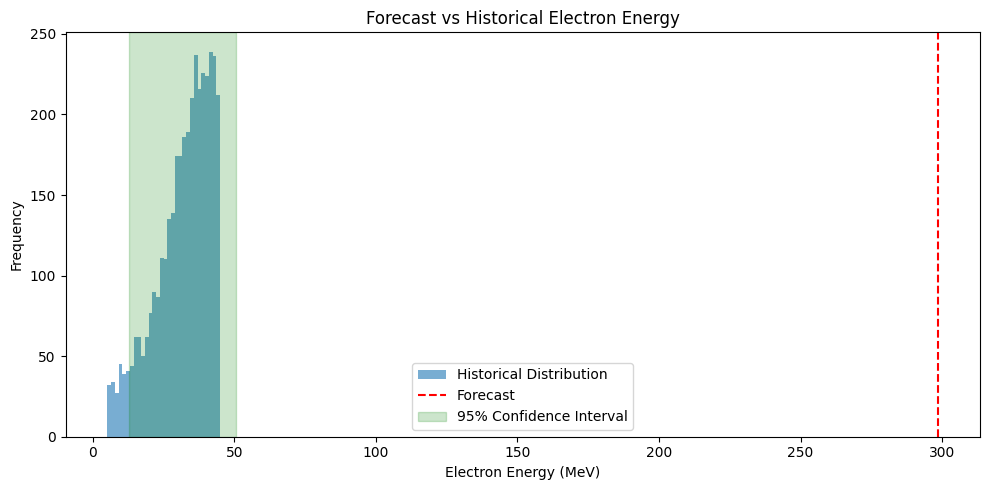

Forecast is a statistical outlier.


In [181]:
# historical values and a new forecast
historical = df_filtered['electrons_charge_pC'].values
forecast = 298.68  # your predicted value

# Compute 95% confidence interval 
# I take 95% assuming normalitymean = np.mean(historical)
std = np.std(historical)
ci_low, ci_high = mean - 1.96 * std, mean + 1.96 * std

# Plot
plt.figure(figsize=(10, 5))
plt.hist(historical, bins=30, alpha=0.6, label='Historical Distribution')
plt.axvline(forecast, color='red', linestyle='--', label='Forecast')
plt.axvspan(ci_low, ci_high, color='green', alpha=0.2, label='95% Confidence Interval')
plt.title('Forecast vs Historical Electron Energy')
plt.xlabel('Electron Energy (MeV)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

if forecast < ci_low or forecast > ci_high:
    print("Forecast is a statistical outlier.")
else:
    print("Forecast is within expected range.")

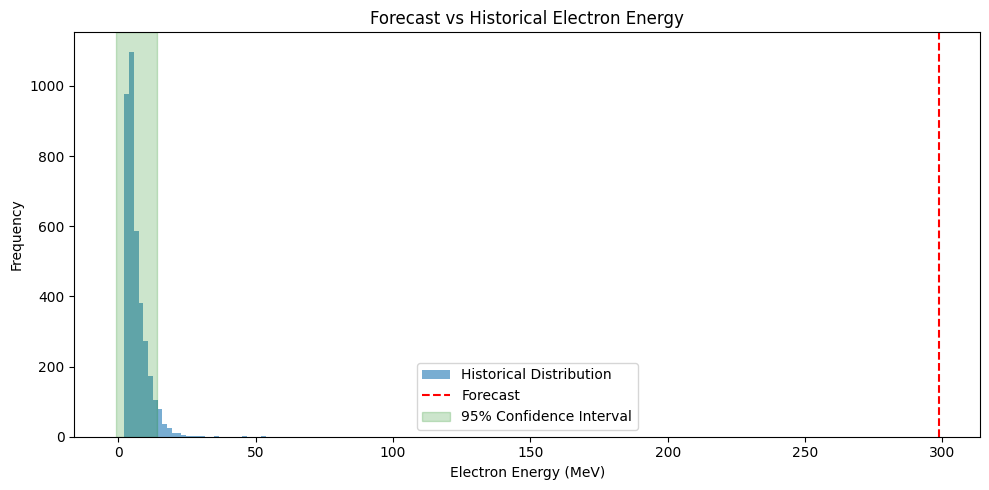

Forecast is a statistical outlier.


In [180]:
# Example: historical values and a new forecast
historical = df_filtered['electrons_energy_mad_MeV'].values
forecast = 298.68  # your predicted value

# Compute 95% confidence interval 
# I take 95% assuming normality
mean = np.mean(historical)
std = np.std(historical)
ci_low, ci_high = mean - 1.96 * std, mean + 1.96 * std

# Plot
plt.figure(figsize=(10, 5))
plt.hist(historical, bins=30, alpha=0.6, label='Historical Distribution')
plt.axvline(forecast, color='red', linestyle='--', label='Forecast')
plt.axvspan(ci_low, ci_high, color='green', alpha=0.2, label='95% Confidence Interval')
plt.title('Forecast vs Historical Electron Energy')
plt.xlabel('Electron Energy (MeV)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

if forecast < ci_low or forecast > ci_high:
    print("Forecast is a statistical outlier.")
else:
    print("Forecast is within expected range.")

### Feature Importance from the XGBoost Model
Since i am using XGBRegressor, it can provide feature importance scores, telling which laser parameters contributed most to predicting electrons_energy_median_MeV.

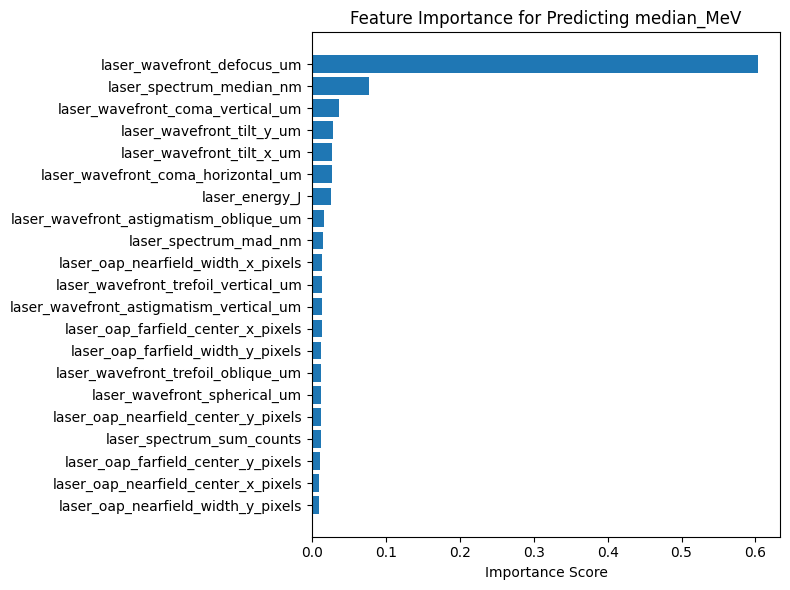

In [216]:
# Recover feature names
feature_names = X.columns.tolist()  # X is your original DataFrame with features

# Use feature names with feature importances
importances = model.estimators_[0].feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Feature Importance for Predicting median_MeV')
plt.tight_layout()
plt.show()

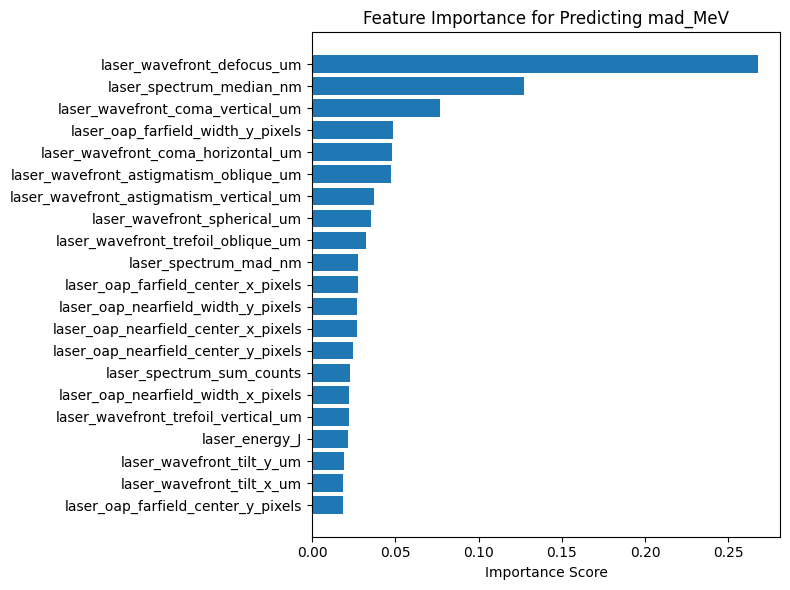

In [217]:
# Recover feature names
feature_names = X.columns.tolist()  # X is your original DataFrame with features

# Use feature names with feature importances
importances = model.estimators_[1].feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Feature Importance for Predicting mad_MeV')
plt.tight_layout()
plt.show()

In [ ]:
##################################################################################################

### Histogram

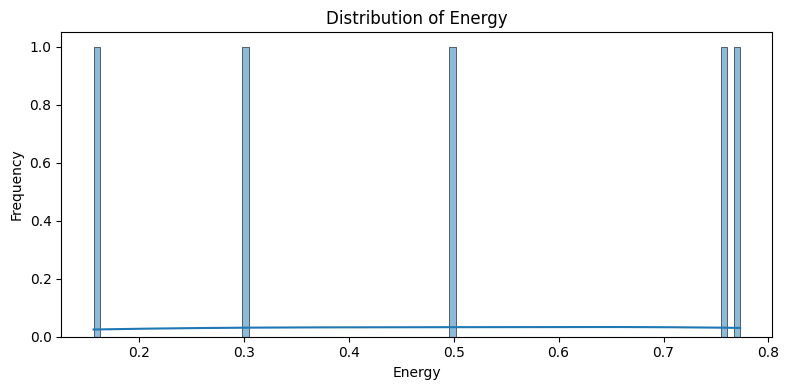

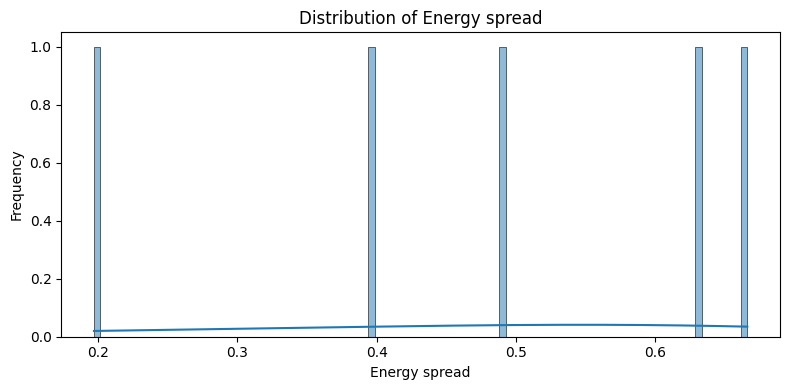

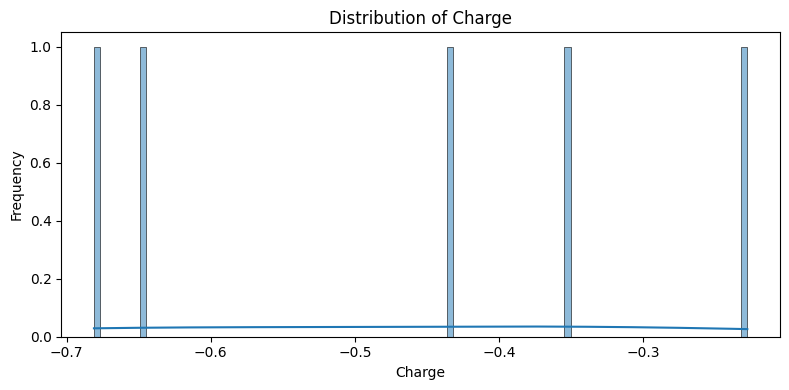

In [171]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=100, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<Axes: >

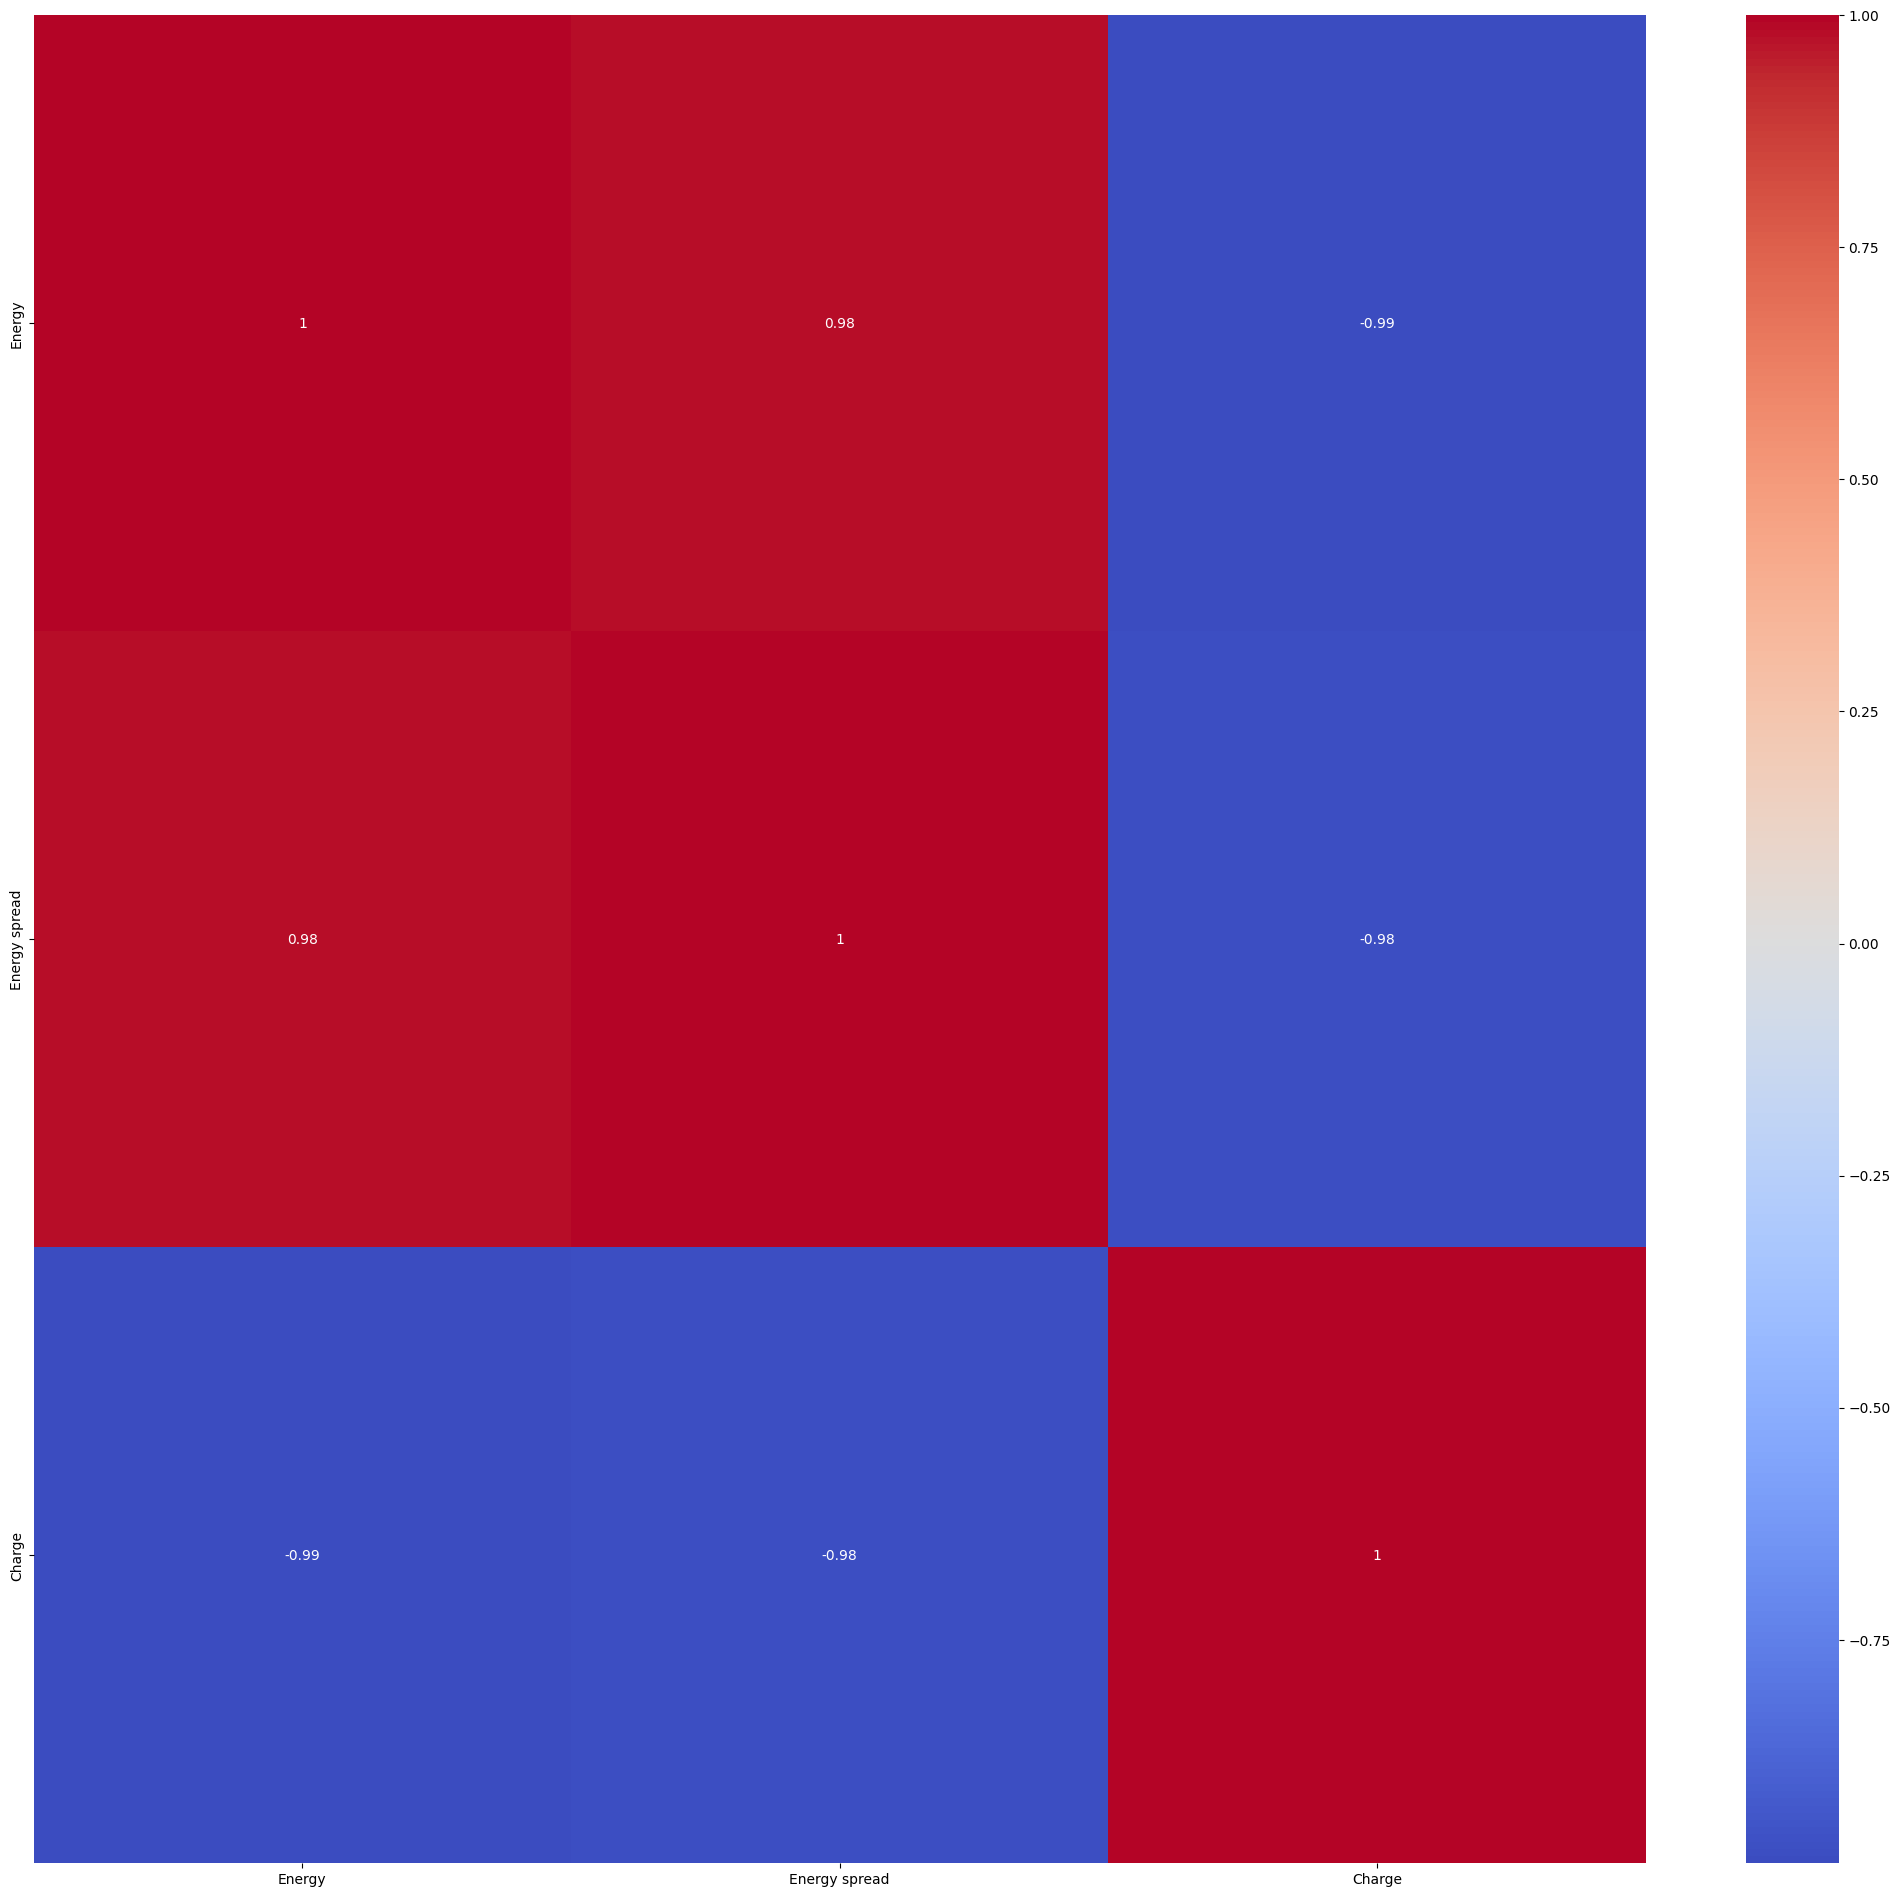

In [170]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(26,24))
sns.heatmap(corr, cmap='coolwarm', annot=True)